## Task:

- use Keras :)
- **Predict if employee stayed or left the company**
- build confusion matrix
- experiment with parameters to get better accuracy

Necesary data pre-processing steps:
- Data Normalization (*) 
- Spliting data into training and testing sets


(\*) Read more about Scikit's ```MinMaxScaler``` or ```Normalizer``` on:
- [Normalization](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)
- [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

----

Dataset source: https://www.kaggle.com/ludobenistant/hr-analytics

## Additional task:

Requirements: Python and maybe basic Numpy

Pretend that the dataset is too bit to fit into single Matrix. 

**Write generator that will iterate over the data during model training.**

The generator should:

- accept batch of any size
- generate batches for training/testing data and training/testing labels
- be usable by keras ```model.fit_generator``` (check method **"fit_generator"** on [Keras page](https://keras.io/models/sequential/))


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os


In [2]:
hr_dataset = pd.read_csv(os.path.join('datasets','HR_comma_sep.csv'))
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


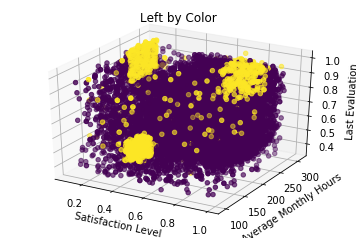

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = hr_dataset['satisfaction_level']
y = hr_dataset['average_montly_hours']
z = hr_dataset['last_evaluation']
c = hr_dataset['left']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Left by Color')
plt.show()

In [4]:
# one-hot encode sales
hr_data = hr_dataset.join(pd.get_dummies(hr_dataset['sales']), rsuffix='_dept').drop('sales', axis=1)

# one-hot encode salary
hr_data = hr_data.join(pd.get_dummies(hr_dataset['salary']), rsuffix='_salary').drop('salary', axis=1)


In [5]:
hr_data.shape

(14999, 21)

In [6]:
labels = hr_data[['left']]
feats = hr_data.drop('left', axis=1)


In [7]:
labels['left'].dtype

dtype('int64')

In [8]:
# normalize data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(feats))

df.describe().round(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.1,-2.1,-1.5,-2.1,-1.0,-0.4,-0.1,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,-0.6,-0.4,-0.5,-0.3,-1.0,-0.9
25%,-0.7,-0.9,-0.7,-0.9,-0.3,-0.4,-0.1,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,-0.6,-0.4,-0.5,-0.3,-1.0,-0.9
50%,0.1,0.0,0.2,-0.0,-0.3,-0.4,-0.1,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,-0.6,-0.4,-0.5,-0.3,-1.0,-0.9
75%,0.8,0.9,1.0,0.9,0.3,-0.4,-0.1,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,1.6,-0.4,-0.5,-0.3,1.0,1.2
max,1.6,1.7,2.6,2.2,4.5,2.4,6.8,3.4,4.2,4.3,4.4,4.8,4.1,4.0,1.6,2.4,2.1,3.3,1.0,1.2


In [111]:
X_train = df.values
y_train = hr_data['left'].values

import sklearn.tree

tree = sklearn.tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

print(hr_data.drop('left',axis =1).columns.values, tree.feature_importances_.round(3))

usefulColumns = df.columns.values[tree.feature_importances_ > 0.005]
print('\nChosen columns:',usefulColumns)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
#usefulColumns = ['satisfaction_level', 'average_montly_hours', 'last_evaluation']

poly = PolynomialFeatures(2)

X = poly.fit_transform(df[usefulColumns].values)
y = labels.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'IT' 'RandD' 'accounting' 'hr' 'management'
 'marketing' 'product_mng' 'sales_dept' 'support' 'technical' 'high' 'low'
 'medium'] [ 0.494  0.147  0.107  0.094  0.141  0.001  0.     0.001  0.001  0.     0.001
  0.001  0.     0.     0.002  0.003  0.004  0.001  0.002  0.001]

Chosen columns: [0 1 2 3 4]


In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((10049, 21), (4950, 21), (10049, 1), (4950, 1))

In [113]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, LSTM
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.np_utils import to_categorical

In [126]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1], ),activation=None))
model.add(Dropout(0.5))
model.add(Dense(10,activation='sigmoid'))
model.add(Dropout(0.5))
#model.add(Dense(len(usefulColumns),activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(5,activation='relu'))
#model.add(Dropout(0.5))
# model.add(Dense(8))
# model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [127]:
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [131]:
# train model
model.fit(X_train, y_train, epochs = 10000, batch_size=15000, validation_split=0.2)

Train on 8039 samples, validate on 2010 samples
Epoch 1/10000
8039/8039 [==============================] - 0s - loss: 0.5338 - acc: 0.7607 - val_loss: 0.4592 - val_acc: 0.7920
Epoch 2/10000
8039/8039 [==============================] - 0s - loss: 0.5341 - acc: 0.7559 - val_loss: 0.4589 - val_acc: 0.7920
Epoch 3/10000
8039/8039 [==============================] - 0s - loss: 0.5329 - acc: 0.7551 - val_loss: 0.4587 - val_acc: 0.7920
Epoch 4/10000
8039/8039 [==============================] - 0s - loss: 0.5322 - acc: 0.7490 - val_loss: 0.4584 - val_acc: 0.7920
Epoch 5/10000
8039/8039 [==============================] - 0s - loss: 0.5335 - acc: 0.7503 - val_loss: 0.4582 - val_acc: 0.7920
Epoch 6/10000
8039/8039 [==============================] - 0s - loss: 0.5326 - acc: 0.7586 - val_loss: 0.4579 - val_acc: 0.7920
Epoch 7/10000
8039/8039 [==============================] - 0s - loss: 0.5356 - acc: 0.7502 - val_loss: 0.4577 - val_acc: 0.7930
Epoch 8/10000
8039/8039 [==============================]

8039/8039 [==============================] - 0s - loss: 0.5217 - acc: 0.7590 - val_loss: 0.4445 - val_acc: 0.8010
Epoch 65/10000
8039/8039 [==============================] - 0s - loss: 0.5174 - acc: 0.7638 - val_loss: 0.4443 - val_acc: 0.8010
Epoch 66/10000
8039/8039 [==============================] - 0s - loss: 0.5243 - acc: 0.7581 - val_loss: 0.4440 - val_acc: 0.8010
Epoch 67/10000
8039/8039 [==============================] - 0s - loss: 0.5226 - acc: 0.7577 - val_loss: 0.4438 - val_acc: 0.8010
Epoch 68/10000
8039/8039 [==============================] - 0s - loss: 0.5111 - acc: 0.7668 - val_loss: 0.4436 - val_acc: 0.8015
Epoch 69/10000
8039/8039 [==============================] - 0s - loss: 0.5149 - acc: 0.7654 - val_loss: 0.4434 - val_acc: 0.8015
Epoch 70/10000
8039/8039 [==============================] - 0s - loss: 0.5194 - acc: 0.7654 - val_loss: 0.4432 - val_acc: 0.8015
Epoch 71/10000
8039/8039 [==============================] - 0s - loss: 0.5198 - acc: 0.7646 - val_loss: 0.4429 -

8039/8039 [==============================] - 0s - loss: 0.5065 - acc: 0.7675 - val_loss: 0.4311 - val_acc: 0.8040
Epoch 128/10000
8039/8039 [==============================] - 0s - loss: 0.5049 - acc: 0.7683 - val_loss: 0.4309 - val_acc: 0.8040
Epoch 129/10000
8039/8039 [==============================] - 0s - loss: 0.5075 - acc: 0.7620 - val_loss: 0.4307 - val_acc: 0.8040
Epoch 130/10000
8039/8039 [==============================] - 0s - loss: 0.5046 - acc: 0.7660 - val_loss: 0.4305 - val_acc: 0.8040
Epoch 131/10000
8039/8039 [==============================] - 0s - loss: 0.5043 - acc: 0.7655 - val_loss: 0.4303 - val_acc: 0.8040
Epoch 132/10000
8039/8039 [==============================] - 0s - loss: 0.5128 - acc: 0.7637 - val_loss: 0.4301 - val_acc: 0.8040
Epoch 133/10000
8039/8039 [==============================] - 0s - loss: 0.5078 - acc: 0.7640 - val_loss: 0.4299 - val_acc: 0.8040
Epoch 134/10000
8039/8039 [==============================] - 0s - loss: 0.5074 - acc: 0.7634 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4962 - acc: 0.7702 - val_loss: 0.4189 - val_acc: 0.8070
Epoch 191/10000
8039/8039 [==============================] - 0s - loss: 0.4966 - acc: 0.7726 - val_loss: 0.4187 - val_acc: 0.8070
Epoch 192/10000
8039/8039 [==============================] - 0s - loss: 0.4974 - acc: 0.7686 - val_loss: 0.4185 - val_acc: 0.8070
Epoch 193/10000
8039/8039 [==============================] - 0s - loss: 0.4992 - acc: 0.7669 - val_loss: 0.4183 - val_acc: 0.8070
Epoch 194/10000
8039/8039 [==============================] - 0s - loss: 0.4945 - acc: 0.7735 - val_loss: 0.4181 - val_acc: 0.8070
Epoch 195/10000
8039/8039 [==============================] - 0s - loss: 0.4991 - acc: 0.7717 - val_loss: 0.4179 - val_acc: 0.8070
Epoch 196/10000
8039/8039 [==============================] - 0s - loss: 0.4935 - acc: 0.7684 - val_loss: 0.4177 - val_acc: 0.8070
Epoch 197/10000
8039/8039 [==============================] - 0s - loss: 0.4914 - acc: 0.7727 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4821 - acc: 0.7752 - val_loss: 0.4076 - val_acc: 0.8109
Epoch 254/10000
8039/8039 [==============================] - 0s - loss: 0.4877 - acc: 0.7742 - val_loss: 0.4075 - val_acc: 0.8114
Epoch 255/10000
8039/8039 [==============================] - 0s - loss: 0.4820 - acc: 0.7773 - val_loss: 0.4073 - val_acc: 0.8114
Epoch 256/10000
8039/8039 [==============================] - 0s - loss: 0.4783 - acc: 0.7750 - val_loss: 0.4071 - val_acc: 0.8114
Epoch 257/10000
8039/8039 [==============================] - 0s - loss: 0.4857 - acc: 0.7791 - val_loss: 0.4069 - val_acc: 0.8114
Epoch 258/10000
8039/8039 [==============================] - 0s - loss: 0.4825 - acc: 0.7776 - val_loss: 0.4068 - val_acc: 0.8114
Epoch 259/10000
8039/8039 [==============================] - 0s - loss: 0.4850 - acc: 0.7734 - val_loss: 0.4066 - val_acc: 0.8114
Epoch 260/10000
8039/8039 [==============================] - 0s - loss: 0.4831 - acc: 0.7777 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4750 - acc: 0.7775 - val_loss: 0.3972 - val_acc: 0.8144
Epoch 317/10000
8039/8039 [==============================] - 0s - loss: 0.4773 - acc: 0.7782 - val_loss: 0.3971 - val_acc: 0.8144
Epoch 318/10000
8039/8039 [==============================] - 0s - loss: 0.4715 - acc: 0.7760 - val_loss: 0.3969 - val_acc: 0.8144
Epoch 319/10000
8039/8039 [==============================] - 0s - loss: 0.4763 - acc: 0.7803 - val_loss: 0.3968 - val_acc: 0.8149
Epoch 320/10000
8039/8039 [==============================] - 0s - loss: 0.4763 - acc: 0.7811 - val_loss: 0.3966 - val_acc: 0.8149
Epoch 321/10000
8039/8039 [==============================] - 0s - loss: 0.4738 - acc: 0.7801 - val_loss: 0.3964 - val_acc: 0.8149
Epoch 322/10000
8039/8039 [==============================] - 0s - loss: 0.4767 - acc: 0.7777 - val_loss: 0.3963 - val_acc: 0.8149
Epoch 323/10000
8039/8039 [==============================] - 0s - loss: 0.4714 - acc: 0.7823 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4626 - acc: 0.7847 - val_loss: 0.3876 - val_acc: 0.8149
Epoch 380/10000
8039/8039 [==============================] - 0s - loss: 0.4701 - acc: 0.7796 - val_loss: 0.3874 - val_acc: 0.8149
Epoch 381/10000
8039/8039 [==============================] - 0s - loss: 0.4652 - acc: 0.7841 - val_loss: 0.3873 - val_acc: 0.8154
Epoch 382/10000
8039/8039 [==============================] - 0s - loss: 0.4637 - acc: 0.7837 - val_loss: 0.3871 - val_acc: 0.8154
Epoch 383/10000
8039/8039 [==============================] - 0s - loss: 0.4661 - acc: 0.7822 - val_loss: 0.3870 - val_acc: 0.8154
Epoch 384/10000
8039/8039 [==============================] - 0s - loss: 0.4633 - acc: 0.7857 - val_loss: 0.3868 - val_acc: 0.8154
Epoch 385/10000
8039/8039 [==============================] - 0s - loss: 0.4715 - acc: 0.7771 - val_loss: 0.3867 - val_acc: 0.8154
Epoch 386/10000
8039/8039 [==============================] - 0s - loss: 0.4636 - acc: 0.7799 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4591 - acc: 0.7893 - val_loss: 0.3786 - val_acc: 0.8184
Epoch 443/10000
8039/8039 [==============================] - 0s - loss: 0.4575 - acc: 0.7850 - val_loss: 0.3785 - val_acc: 0.8184
Epoch 444/10000
8039/8039 [==============================] - 0s - loss: 0.4552 - acc: 0.7864 - val_loss: 0.3783 - val_acc: 0.8184
Epoch 445/10000
8039/8039 [==============================] - 0s - loss: 0.4610 - acc: 0.7865 - val_loss: 0.3782 - val_acc: 0.8184
Epoch 446/10000
8039/8039 [==============================] - 0s - loss: 0.4608 - acc: 0.7867 - val_loss: 0.3781 - val_acc: 0.8184
Epoch 447/10000
8039/8039 [==============================] - 0s - loss: 0.4615 - acc: 0.7808 - val_loss: 0.3779 - val_acc: 0.8184
Epoch 448/10000
8039/8039 [==============================] - 0s - loss: 0.4606 - acc: 0.7824 - val_loss: 0.3778 - val_acc: 0.8184
Epoch 449/10000
8039/8039 [==============================] - 0s - loss: 0.4606 - acc: 0.7878 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4490 - acc: 0.7888 - val_loss: 0.3701 - val_acc: 0.8194
Epoch 506/10000
8039/8039 [==============================] - 0s - loss: 0.4422 - acc: 0.7985 - val_loss: 0.3700 - val_acc: 0.8194
Epoch 507/10000
8039/8039 [==============================] - 0s - loss: 0.4558 - acc: 0.7901 - val_loss: 0.3699 - val_acc: 0.8194
Epoch 508/10000
8039/8039 [==============================] - 0s - loss: 0.4538 - acc: 0.7859 - val_loss: 0.3697 - val_acc: 0.8194
Epoch 509/10000
8039/8039 [==============================] - 0s - loss: 0.4569 - acc: 0.7837 - val_loss: 0.3696 - val_acc: 0.8194
Epoch 510/10000
8039/8039 [==============================] - 0s - loss: 0.4475 - acc: 0.7913 - val_loss: 0.3695 - val_acc: 0.8194
Epoch 511/10000
8039/8039 [==============================] - 0s - loss: 0.4524 - acc: 0.7884 - val_loss: 0.3693 - val_acc: 0.8194
Epoch 512/10000
8039/8039 [==============================] - 0s - loss: 0.4470 - acc: 0.7913 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4415 - acc: 0.7944 - val_loss: 0.3621 - val_acc: 0.8229
Epoch 569/10000
8039/8039 [==============================] - 0s - loss: 0.4409 - acc: 0.7923 - val_loss: 0.3620 - val_acc: 0.8229
Epoch 570/10000
8039/8039 [==============================] - 0s - loss: 0.4457 - acc: 0.7885 - val_loss: 0.3618 - val_acc: 0.8229
Epoch 571/10000
8039/8039 [==============================] - 0s - loss: 0.4458 - acc: 0.7914 - val_loss: 0.3617 - val_acc: 0.8229
Epoch 572/10000
8039/8039 [==============================] - 0s - loss: 0.4421 - acc: 0.7844 - val_loss: 0.3616 - val_acc: 0.8229
Epoch 573/10000
8039/8039 [==============================] - 0s - loss: 0.4456 - acc: 0.7930 - val_loss: 0.3615 - val_acc: 0.8229
Epoch 574/10000
8039/8039 [==============================] - 0s - loss: 0.4398 - acc: 0.7948 - val_loss: 0.3614 - val_acc: 0.8229
Epoch 575/10000
8039/8039 [==============================] - 0s - loss: 0.4400 - acc: 0.7949 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4393 - acc: 0.7944 - val_loss: 0.3545 - val_acc: 0.8229
Epoch 632/10000
8039/8039 [==============================] - 0s - loss: 0.4409 - acc: 0.7930 - val_loss: 0.3544 - val_acc: 0.8229
Epoch 633/10000
8039/8039 [==============================] - 0s - loss: 0.4423 - acc: 0.7914 - val_loss: 0.3543 - val_acc: 0.8229
Epoch 634/10000
8039/8039 [==============================] - 0s - loss: 0.4333 - acc: 0.7986 - val_loss: 0.3542 - val_acc: 0.8229
Epoch 635/10000
8039/8039 [==============================] - 0s - loss: 0.4421 - acc: 0.7921 - val_loss: 0.3541 - val_acc: 0.8229
Epoch 636/10000
8039/8039 [==============================] - 0s - loss: 0.4363 - acc: 0.7950 - val_loss: 0.3540 - val_acc: 0.8229
Epoch 637/10000
8039/8039 [==============================] - 0s - loss: 0.4418 - acc: 0.7894 - val_loss: 0.3538 - val_acc: 0.8229
Epoch 638/10000
8039/8039 [==============================] - 0s - loss: 0.4337 - acc: 0.7962 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4355 - acc: 0.7982 - val_loss: 0.3474 - val_acc: 0.8219
Epoch 695/10000
8039/8039 [==============================] - 0s - loss: 0.4273 - acc: 0.8031 - val_loss: 0.3473 - val_acc: 0.8224
Epoch 696/10000
8039/8039 [==============================] - 0s - loss: 0.4333 - acc: 0.8010 - val_loss: 0.3471 - val_acc: 0.8224
Epoch 697/10000
8039/8039 [==============================] - 0s - loss: 0.4296 - acc: 0.7962 - val_loss: 0.3470 - val_acc: 0.8224
Epoch 698/10000
8039/8039 [==============================] - 0s - loss: 0.4302 - acc: 0.7999 - val_loss: 0.3469 - val_acc: 0.8224
Epoch 699/10000
8039/8039 [==============================] - 0s - loss: 0.4308 - acc: 0.7986 - val_loss: 0.3468 - val_acc: 0.8224
Epoch 700/10000
8039/8039 [==============================] - 0s - loss: 0.4324 - acc: 0.7936 - val_loss: 0.3467 - val_acc: 0.8224
Epoch 701/10000
8039/8039 [==============================] - 0s - loss: 0.4376 - acc: 0.7925 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4278 - acc: 0.8050 - val_loss: 0.3406 - val_acc: 0.8209
Epoch 758/10000
8039/8039 [==============================] - 0s - loss: 0.4209 - acc: 0.8087 - val_loss: 0.3405 - val_acc: 0.8209
Epoch 759/10000
8039/8039 [==============================] - 0s - loss: 0.4215 - acc: 0.8030 - val_loss: 0.3403 - val_acc: 0.8209
Epoch 760/10000
8039/8039 [==============================] - 0s - loss: 0.4263 - acc: 0.8040 - val_loss: 0.3402 - val_acc: 0.8209
Epoch 761/10000
8039/8039 [==============================] - 0s - loss: 0.4231 - acc: 0.8062 - val_loss: 0.3401 - val_acc: 0.8214
Epoch 762/10000
8039/8039 [==============================] - 0s - loss: 0.4194 - acc: 0.8036 - val_loss: 0.3400 - val_acc: 0.8214
Epoch 763/10000
8039/8039 [==============================] - 0s - loss: 0.4232 - acc: 0.8045 - val_loss: 0.3399 - val_acc: 0.8214
Epoch 764/10000
8039/8039 [==============================] - 0s - loss: 0.4200 - acc: 0.8064 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4226 - acc: 0.8061 - val_loss: 0.3340 - val_acc: 0.8229
Epoch 821/10000
8039/8039 [==============================] - 0s - loss: 0.4183 - acc: 0.8042 - val_loss: 0.3339 - val_acc: 0.8229
Epoch 822/10000
8039/8039 [==============================] - 0s - loss: 0.4233 - acc: 0.8046 - val_loss: 0.3338 - val_acc: 0.8229
Epoch 823/10000
8039/8039 [==============================] - 0s - loss: 0.4216 - acc: 0.8078 - val_loss: 0.3337 - val_acc: 0.8229
Epoch 824/10000
8039/8039 [==============================] - 0s - loss: 0.4161 - acc: 0.8067 - val_loss: 0.3336 - val_acc: 0.8239
Epoch 825/10000
8039/8039 [==============================] - 0s - loss: 0.4188 - acc: 0.8025 - val_loss: 0.3335 - val_acc: 0.8239
Epoch 826/10000
8039/8039 [==============================] - 0s - loss: 0.4193 - acc: 0.8016 - val_loss: 0.3334 - val_acc: 0.8254
Epoch 827/10000
8039/8039 [==============================] - 0s - loss: 0.4231 - acc: 0.8046 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4088 - acc: 0.8093 - val_loss: 0.3278 - val_acc: 0.8318
Epoch 884/10000
8039/8039 [==============================] - 0s - loss: 0.4111 - acc: 0.8086 - val_loss: 0.3277 - val_acc: 0.8318
Epoch 885/10000
8039/8039 [==============================] - 0s - loss: 0.4043 - acc: 0.8115 - val_loss: 0.3276 - val_acc: 0.8323
Epoch 886/10000
8039/8039 [==============================] - 0s - loss: 0.4164 - acc: 0.8079 - val_loss: 0.3276 - val_acc: 0.8333
Epoch 887/10000
8039/8039 [==============================] - 0s - loss: 0.4118 - acc: 0.8109 - val_loss: 0.3275 - val_acc: 0.8333
Epoch 888/10000
8039/8039 [==============================] - 0s - loss: 0.4109 - acc: 0.8048 - val_loss: 0.3274 - val_acc: 0.8333
Epoch 889/10000
8039/8039 [==============================] - 0s - loss: 0.4144 - acc: 0.8098 - val_loss: 0.3273 - val_acc: 0.8338
Epoch 890/10000
8039/8039 [==============================] - 0s - loss: 0.4156 - acc: 0.8074 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4091 - acc: 0.8096 - val_loss: 0.3219 - val_acc: 0.8507
Epoch 947/10000
8039/8039 [==============================] - 0s - loss: 0.4084 - acc: 0.8105 - val_loss: 0.3218 - val_acc: 0.8512
Epoch 948/10000
8039/8039 [==============================] - 0s - loss: 0.4140 - acc: 0.8076 - val_loss: 0.3217 - val_acc: 0.8517
Epoch 949/10000
8039/8039 [==============================] - 0s - loss: 0.4072 - acc: 0.8117 - val_loss: 0.3217 - val_acc: 0.8522
Epoch 950/10000
8039/8039 [==============================] - 0s - loss: 0.4106 - acc: 0.8102 - val_loss: 0.3216 - val_acc: 0.8522
Epoch 951/10000
8039/8039 [==============================] - 0s - loss: 0.4071 - acc: 0.8114 - val_loss: 0.3215 - val_acc: 0.8522
Epoch 952/10000
8039/8039 [==============================] - 0s - loss: 0.4071 - acc: 0.8068 - val_loss: 0.3214 - val_acc: 0.8527
Epoch 953/10000
8039/8039 [==============================] - 0s - loss: 0.4064 - acc: 0.8112 - val_loss: 0

8039/8039 [==============================] - 0s - loss: 0.4074 - acc: 0.8130 - val_loss: 0.3163 - val_acc: 0.8672
Epoch 1010/10000
8039/8039 [==============================] - 0s - loss: 0.4045 - acc: 0.8096 - val_loss: 0.3162 - val_acc: 0.8672
Epoch 1011/10000
8039/8039 [==============================] - 0s - loss: 0.4051 - acc: 0.8176 - val_loss: 0.3161 - val_acc: 0.8672
Epoch 1012/10000
8039/8039 [==============================] - 0s - loss: 0.4059 - acc: 0.8149 - val_loss: 0.3160 - val_acc: 0.8682
Epoch 1013/10000
8039/8039 [==============================] - 0s - loss: 0.3994 - acc: 0.8129 - val_loss: 0.3160 - val_acc: 0.8682
Epoch 1014/10000
8039/8039 [==============================] - 0s - loss: 0.4023 - acc: 0.8123 - val_loss: 0.3159 - val_acc: 0.8687
Epoch 1015/10000
8039/8039 [==============================] - 0s - loss: 0.3985 - acc: 0.8156 - val_loss: 0.3158 - val_acc: 0.8692
Epoch 1016/10000
8039/8039 [==============================] - 0s - loss: 0.4052 - acc: 0.8181 - val_

8039/8039 [==============================] - 0s - loss: 0.4010 - acc: 0.8108 - val_loss: 0.3110 - val_acc: 0.8831
Epoch 1072/10000
8039/8039 [==============================] - 0s - loss: 0.4025 - acc: 0.8140 - val_loss: 0.3109 - val_acc: 0.8831
Epoch 1073/10000
8039/8039 [==============================] - 0s - loss: 0.3930 - acc: 0.8212 - val_loss: 0.3108 - val_acc: 0.8851
Epoch 1074/10000
8039/8039 [==============================] - 0s - loss: 0.4020 - acc: 0.8175 - val_loss: 0.3108 - val_acc: 0.8856
Epoch 1075/10000
8039/8039 [==============================] - 0s - loss: 0.3974 - acc: 0.8183 - val_loss: 0.3107 - val_acc: 0.8851
Epoch 1076/10000
8039/8039 [==============================] - 0s - loss: 0.3991 - acc: 0.8175 - val_loss: 0.3106 - val_acc: 0.8856
Epoch 1077/10000
8039/8039 [==============================] - 0s - loss: 0.3952 - acc: 0.8185 - val_loss: 0.3105 - val_acc: 0.8856
Epoch 1078/10000
8039/8039 [==============================] - 0s - loss: 0.4018 - acc: 0.8165 - val_

8039/8039 [==============================] - 0s - loss: 0.3933 - acc: 0.8198 - val_loss: 0.3060 - val_acc: 0.8965
Epoch 1134/10000
8039/8039 [==============================] - 0s - loss: 0.3971 - acc: 0.8174 - val_loss: 0.3059 - val_acc: 0.8965
Epoch 1135/10000
8039/8039 [==============================] - 0s - loss: 0.3948 - acc: 0.8185 - val_loss: 0.3058 - val_acc: 0.8965
Epoch 1136/10000
8039/8039 [==============================] - 0s - loss: 0.3922 - acc: 0.8232 - val_loss: 0.3057 - val_acc: 0.8965
Epoch 1137/10000
8039/8039 [==============================] - 0s - loss: 0.3934 - acc: 0.8184 - val_loss: 0.3057 - val_acc: 0.8970
Epoch 1138/10000
8039/8039 [==============================] - 0s - loss: 0.3893 - acc: 0.8241 - val_loss: 0.3056 - val_acc: 0.8970
Epoch 1139/10000
8039/8039 [==============================] - 0s - loss: 0.3979 - acc: 0.8161 - val_loss: 0.3055 - val_acc: 0.8970
Epoch 1140/10000
8039/8039 [==============================] - 0s - loss: 0.3933 - acc: 0.8178 - val_

8039/8039 [==============================] - 0s - loss: 0.3858 - acc: 0.8217 - val_loss: 0.3012 - val_acc: 0.9080
Epoch 1196/10000
8039/8039 [==============================] - 0s - loss: 0.3899 - acc: 0.8262 - val_loss: 0.3011 - val_acc: 0.9080
Epoch 1197/10000
8039/8039 [==============================] - 0s - loss: 0.3917 - acc: 0.8257 - val_loss: 0.3010 - val_acc: 0.9080
Epoch 1198/10000
8039/8039 [==============================] - 0s - loss: 0.3930 - acc: 0.8200 - val_loss: 0.3010 - val_acc: 0.9085
Epoch 1199/10000
8039/8039 [==============================] - 0s - loss: 0.3959 - acc: 0.8188 - val_loss: 0.3009 - val_acc: 0.9085
Epoch 1200/10000
8039/8039 [==============================] - 0s - loss: 0.3878 - acc: 0.8212 - val_loss: 0.3008 - val_acc: 0.9085
Epoch 1201/10000
8039/8039 [==============================] - 0s - loss: 0.3919 - acc: 0.8234 - val_loss: 0.3007 - val_acc: 0.9085
Epoch 1202/10000
8039/8039 [==============================] - 0s - loss: 0.3874 - acc: 0.8186 - val_

8039/8039 [==============================] - 0s - loss: 0.3829 - acc: 0.8254 - val_loss: 0.2967 - val_acc: 0.9199
Epoch 1258/10000
8039/8039 [==============================] - 0s - loss: 0.3796 - acc: 0.8232 - val_loss: 0.2966 - val_acc: 0.9199
Epoch 1259/10000
8039/8039 [==============================] - 0s - loss: 0.3890 - acc: 0.8226 - val_loss: 0.2965 - val_acc: 0.9199
Epoch 1260/10000
8039/8039 [==============================] - 0s - loss: 0.3809 - acc: 0.8245 - val_loss: 0.2964 - val_acc: 0.9204
Epoch 1261/10000
8039/8039 [==============================] - 0s - loss: 0.3897 - acc: 0.8242 - val_loss: 0.2964 - val_acc: 0.9204
Epoch 1262/10000
8039/8039 [==============================] - 0s - loss: 0.3833 - acc: 0.8258 - val_loss: 0.2963 - val_acc: 0.9204
Epoch 1263/10000
8039/8039 [==============================] - 0s - loss: 0.3832 - acc: 0.8265 - val_loss: 0.2962 - val_acc: 0.9204
Epoch 1264/10000
8039/8039 [==============================] - 0s - loss: 0.3813 - acc: 0.8286 - val_

8039/8039 [==============================] - 0s - loss: 0.3764 - acc: 0.8306 - val_loss: 0.2923 - val_acc: 0.9254
Epoch 1320/10000
8039/8039 [==============================] - 0s - loss: 0.3823 - acc: 0.8287 - val_loss: 0.2922 - val_acc: 0.9254
Epoch 1321/10000
8039/8039 [==============================] - 0s - loss: 0.3807 - acc: 0.8257 - val_loss: 0.2921 - val_acc: 0.9249
Epoch 1322/10000
8039/8039 [==============================] - 0s - loss: 0.3844 - acc: 0.8232 - val_loss: 0.2921 - val_acc: 0.9254
Epoch 1323/10000
8039/8039 [==============================] - 0s - loss: 0.3824 - acc: 0.8260 - val_loss: 0.2920 - val_acc: 0.9259
Epoch 1324/10000
8039/8039 [==============================] - 0s - loss: 0.3824 - acc: 0.8255 - val_loss: 0.2919 - val_acc: 0.9259
Epoch 1325/10000
8039/8039 [==============================] - 0s - loss: 0.3863 - acc: 0.8261 - val_loss: 0.2919 - val_acc: 0.9259
Epoch 1326/10000
8039/8039 [==============================] - 0s - loss: 0.3780 - acc: 0.8307 - val_

8039/8039 [==============================] - 0s - loss: 0.3728 - acc: 0.8283 - val_loss: 0.2881 - val_acc: 0.9308
Epoch 1382/10000
8039/8039 [==============================] - 0s - loss: 0.3757 - acc: 0.8287 - val_loss: 0.2881 - val_acc: 0.9308
Epoch 1383/10000
8039/8039 [==============================] - 0s - loss: 0.3778 - acc: 0.8305 - val_loss: 0.2880 - val_acc: 0.9308
Epoch 1384/10000
8039/8039 [==============================] - 0s - loss: 0.3788 - acc: 0.8255 - val_loss: 0.2879 - val_acc: 0.9308
Epoch 1385/10000
8039/8039 [==============================] - 0s - loss: 0.3795 - acc: 0.8286 - val_loss: 0.2879 - val_acc: 0.9308
Epoch 1386/10000
8039/8039 [==============================] - 0s - loss: 0.3769 - acc: 0.8326 - val_loss: 0.2878 - val_acc: 0.9308
Epoch 1387/10000
8039/8039 [==============================] - 0s - loss: 0.3771 - acc: 0.8278 - val_loss: 0.2877 - val_acc: 0.9313
Epoch 1388/10000
8039/8039 [==============================] - 0s - loss: 0.3734 - acc: 0.8332 - val_

8039/8039 [==============================] - 0s - loss: 0.3733 - acc: 0.8359 - val_loss: 0.2842 - val_acc: 0.9333
Epoch 1444/10000
8039/8039 [==============================] - 0s - loss: 0.3728 - acc: 0.8321 - val_loss: 0.2841 - val_acc: 0.9338
Epoch 1445/10000
8039/8039 [==============================] - 0s - loss: 0.3669 - acc: 0.8306 - val_loss: 0.2841 - val_acc: 0.9338
Epoch 1446/10000
8039/8039 [==============================] - 0s - loss: 0.3729 - acc: 0.8324 - val_loss: 0.2840 - val_acc: 0.9338
Epoch 1447/10000
8039/8039 [==============================] - 0s - loss: 0.3711 - acc: 0.8327 - val_loss: 0.2839 - val_acc: 0.9348
Epoch 1448/10000
8039/8039 [==============================] - 0s - loss: 0.3763 - acc: 0.8311 - val_loss: 0.2839 - val_acc: 0.9348
Epoch 1449/10000
8039/8039 [==============================] - 0s - loss: 0.3719 - acc: 0.8316 - val_loss: 0.2838 - val_acc: 0.9348
Epoch 1450/10000
8039/8039 [==============================] - 0s - loss: 0.3741 - acc: 0.8296 - val_

8039/8039 [==============================] - 0s - loss: 0.3665 - acc: 0.8367 - val_loss: 0.2804 - val_acc: 0.9393
Epoch 1506/10000
8039/8039 [==============================] - 0s - loss: 0.3657 - acc: 0.8377 - val_loss: 0.2804 - val_acc: 0.9393
Epoch 1507/10000
8039/8039 [==============================] - 0s - loss: 0.3640 - acc: 0.8356 - val_loss: 0.2803 - val_acc: 0.9393
Epoch 1508/10000
8039/8039 [==============================] - 0s - loss: 0.3620 - acc: 0.8387 - val_loss: 0.2802 - val_acc: 0.9393
Epoch 1509/10000
8039/8039 [==============================] - 0s - loss: 0.3714 - acc: 0.8303 - val_loss: 0.2802 - val_acc: 0.9393
Epoch 1510/10000
8039/8039 [==============================] - 0s - loss: 0.3639 - acc: 0.8383 - val_loss: 0.2801 - val_acc: 0.9393
Epoch 1511/10000
8039/8039 [==============================] - 0s - loss: 0.3643 - acc: 0.8392 - val_loss: 0.2801 - val_acc: 0.9393
Epoch 1512/10000
8039/8039 [==============================] - 0s - loss: 0.3645 - acc: 0.8403 - val_

8039/8039 [==============================] - 0s - loss: 0.3640 - acc: 0.8407 - val_loss: 0.2769 - val_acc: 0.9418
Epoch 1568/10000
8039/8039 [==============================] - 0s - loss: 0.3729 - acc: 0.8338 - val_loss: 0.2768 - val_acc: 0.9418
Epoch 1569/10000
8039/8039 [==============================] - 0s - loss: 0.3670 - acc: 0.8326 - val_loss: 0.2768 - val_acc: 0.9418
Epoch 1570/10000
8039/8039 [==============================] - 0s - loss: 0.3615 - acc: 0.8385 - val_loss: 0.2767 - val_acc: 0.9418
Epoch 1571/10000
8039/8039 [==============================] - 0s - loss: 0.3645 - acc: 0.8368 - val_loss: 0.2766 - val_acc: 0.9418
Epoch 1572/10000
8039/8039 [==============================] - 0s - loss: 0.3690 - acc: 0.8378 - val_loss: 0.2766 - val_acc: 0.9418
Epoch 1573/10000
8039/8039 [==============================] - 0s - loss: 0.3645 - acc: 0.8369 - val_loss: 0.2765 - val_acc: 0.9418
Epoch 1574/10000
8039/8039 [==============================] - 0s - loss: 0.3597 - acc: 0.8364 - val_

8039/8039 [==============================] - 0s - loss: 0.3627 - acc: 0.8399 - val_loss: 0.2735 - val_acc: 0.9433
Epoch 1630/10000
8039/8039 [==============================] - 0s - loss: 0.3549 - acc: 0.8421 - val_loss: 0.2735 - val_acc: 0.9433
Epoch 1631/10000
8039/8039 [==============================] - 0s - loss: 0.3676 - acc: 0.8333 - val_loss: 0.2734 - val_acc: 0.9433
Epoch 1632/10000
8039/8039 [==============================] - 0s - loss: 0.3576 - acc: 0.8397 - val_loss: 0.2734 - val_acc: 0.9433
Epoch 1633/10000
8039/8039 [==============================] - 0s - loss: 0.3634 - acc: 0.8392 - val_loss: 0.2733 - val_acc: 0.9433
Epoch 1634/10000
8039/8039 [==============================] - 0s - loss: 0.3605 - acc: 0.8407 - val_loss: 0.2733 - val_acc: 0.9433
Epoch 1635/10000
8039/8039 [==============================] - 0s - loss: 0.3558 - acc: 0.8425 - val_loss: 0.2732 - val_acc: 0.9433
Epoch 1636/10000
8039/8039 [==============================] - 0s - loss: 0.3615 - acc: 0.8394 - val_

8039/8039 [==============================] - 0s - loss: 0.3579 - acc: 0.8418 - val_loss: 0.2703 - val_acc: 0.9448
Epoch 1692/10000
8039/8039 [==============================] - 0s - loss: 0.3568 - acc: 0.8400 - val_loss: 0.2703 - val_acc: 0.9448
Epoch 1693/10000
8039/8039 [==============================] - 0s - loss: 0.3630 - acc: 0.8332 - val_loss: 0.2702 - val_acc: 0.9448
Epoch 1694/10000
8039/8039 [==============================] - 0s - loss: 0.3576 - acc: 0.8383 - val_loss: 0.2702 - val_acc: 0.9448
Epoch 1695/10000
8039/8039 [==============================] - 0s - loss: 0.3583 - acc: 0.8348 - val_loss: 0.2702 - val_acc: 0.9448
Epoch 1696/10000
8039/8039 [==============================] - 0s - loss: 0.3599 - acc: 0.8403 - val_loss: 0.2701 - val_acc: 0.9448
Epoch 1697/10000
8039/8039 [==============================] - 0s - loss: 0.3610 - acc: 0.8358 - val_loss: 0.2701 - val_acc: 0.9448
Epoch 1698/10000
8039/8039 [==============================] - 0s - loss: 0.3575 - acc: 0.8418 - val_

8039/8039 [==============================] - 0s - loss: 0.3542 - acc: 0.8398 - val_loss: 0.2673 - val_acc: 0.9433
Epoch 1754/10000
8039/8039 [==============================] - 0s - loss: 0.3533 - acc: 0.8435 - val_loss: 0.2673 - val_acc: 0.9433
Epoch 1755/10000
8039/8039 [==============================] - 0s - loss: 0.3567 - acc: 0.8402 - val_loss: 0.2672 - val_acc: 0.9433
Epoch 1756/10000
8039/8039 [==============================] - 0s - loss: 0.3580 - acc: 0.8416 - val_loss: 0.2672 - val_acc: 0.9433
Epoch 1757/10000
8039/8039 [==============================] - 0s - loss: 0.3568 - acc: 0.8414 - val_loss: 0.2671 - val_acc: 0.9433
Epoch 1758/10000
8039/8039 [==============================] - 0s - loss: 0.3531 - acc: 0.8397 - val_loss: 0.2671 - val_acc: 0.9433
Epoch 1759/10000
8039/8039 [==============================] - 0s - loss: 0.3563 - acc: 0.8416 - val_loss: 0.2671 - val_acc: 0.9433
Epoch 1760/10000
8039/8039 [==============================] - 0s - loss: 0.3483 - acc: 0.8500 - val_

8039/8039 [==============================] - 0s - loss: 0.3461 - acc: 0.8460 - val_loss: 0.2645 - val_acc: 0.9428
Epoch 1816/10000
8039/8039 [==============================] - 0s - loss: 0.3432 - acc: 0.8469 - val_loss: 0.2644 - val_acc: 0.9428
Epoch 1817/10000
8039/8039 [==============================] - 0s - loss: 0.3491 - acc: 0.8521 - val_loss: 0.2644 - val_acc: 0.9428
Epoch 1818/10000
8039/8039 [==============================] - 0s - loss: 0.3503 - acc: 0.8420 - val_loss: 0.2643 - val_acc: 0.9428
Epoch 1819/10000
8039/8039 [==============================] - 0s - loss: 0.3511 - acc: 0.8402 - val_loss: 0.2643 - val_acc: 0.9428
Epoch 1820/10000
8039/8039 [==============================] - 0s - loss: 0.3489 - acc: 0.8500 - val_loss: 0.2642 - val_acc: 0.9428
Epoch 1821/10000
8039/8039 [==============================] - 0s - loss: 0.3550 - acc: 0.8398 - val_loss: 0.2642 - val_acc: 0.9418
Epoch 1822/10000
8039/8039 [==============================] - 0s - loss: 0.3407 - acc: 0.8467 - val_

8039/8039 [==============================] - 0s - loss: 0.3554 - acc: 0.8497 - val_loss: 0.2617 - val_acc: 0.9423
Epoch 1878/10000
8039/8039 [==============================] - 0s - loss: 0.3489 - acc: 0.8456 - val_loss: 0.2617 - val_acc: 0.9423
Epoch 1879/10000
8039/8039 [==============================] - 0s - loss: 0.3466 - acc: 0.8416 - val_loss: 0.2616 - val_acc: 0.9418
Epoch 1880/10000
8039/8039 [==============================] - 0s - loss: 0.3455 - acc: 0.8451 - val_loss: 0.2616 - val_acc: 0.9418
Epoch 1881/10000
8039/8039 [==============================] - 0s - loss: 0.3491 - acc: 0.8465 - val_loss: 0.2615 - val_acc: 0.9418
Epoch 1882/10000
8039/8039 [==============================] - 0s - loss: 0.3532 - acc: 0.8490 - val_loss: 0.2615 - val_acc: 0.9418
Epoch 1883/10000
8039/8039 [==============================] - 0s - loss: 0.3487 - acc: 0.8438 - val_loss: 0.2615 - val_acc: 0.9413
Epoch 1884/10000
8039/8039 [==============================] - 0s - loss: 0.3499 - acc: 0.8453 - val_

8039/8039 [==============================] - 0s - loss: 0.3455 - acc: 0.8480 - val_loss: 0.2591 - val_acc: 0.9393
Epoch 1940/10000
8039/8039 [==============================] - 0s - loss: 0.3464 - acc: 0.8470 - val_loss: 0.2591 - val_acc: 0.9393
Epoch 1941/10000
8039/8039 [==============================] - 0s - loss: 0.3373 - acc: 0.8555 - val_loss: 0.2590 - val_acc: 0.9393
Epoch 1942/10000
8039/8039 [==============================] - 0s - loss: 0.3410 - acc: 0.8487 - val_loss: 0.2590 - val_acc: 0.9393
Epoch 1943/10000
8039/8039 [==============================] - 0s - loss: 0.3481 - acc: 0.8464 - val_loss: 0.2590 - val_acc: 0.9393
Epoch 1944/10000
8039/8039 [==============================] - 0s - loss: 0.3425 - acc: 0.8518 - val_loss: 0.2589 - val_acc: 0.9393
Epoch 1945/10000
8039/8039 [==============================] - 0s - loss: 0.3472 - acc: 0.8469 - val_loss: 0.2589 - val_acc: 0.9393
Epoch 1946/10000
8039/8039 [==============================] - 0s - loss: 0.3487 - acc: 0.8448 - val_

8039/8039 [==============================] - 0s - loss: 0.3396 - acc: 0.8515 - val_loss: 0.2567 - val_acc: 0.9383
Epoch 2002/10000
8039/8039 [==============================] - 0s - loss: 0.3423 - acc: 0.8525 - val_loss: 0.2566 - val_acc: 0.9383
Epoch 2003/10000
8039/8039 [==============================] - 0s - loss: 0.3412 - acc: 0.8476 - val_loss: 0.2566 - val_acc: 0.9383
Epoch 2004/10000
8039/8039 [==============================] - 0s - loss: 0.3392 - acc: 0.8489 - val_loss: 0.2565 - val_acc: 0.9383
Epoch 2005/10000
8039/8039 [==============================] - 0s - loss: 0.3444 - acc: 0.8545 - val_loss: 0.2565 - val_acc: 0.9383
Epoch 2006/10000
8039/8039 [==============================] - 0s - loss: 0.3385 - acc: 0.8537 - val_loss: 0.2565 - val_acc: 0.9383
Epoch 2007/10000
8039/8039 [==============================] - 0s - loss: 0.3446 - acc: 0.8502 - val_loss: 0.2564 - val_acc: 0.9383
Epoch 2008/10000
8039/8039 [==============================] - 0s - loss: 0.3429 - acc: 0.8542 - val_

8039/8039 [==============================] - 0s - loss: 0.3412 - acc: 0.8500 - val_loss: 0.2543 - val_acc: 0.9388
Epoch 2064/10000
8039/8039 [==============================] - 0s - loss: 0.3372 - acc: 0.8518 - val_loss: 0.2543 - val_acc: 0.9388
Epoch 2065/10000
8039/8039 [==============================] - 0s - loss: 0.3357 - acc: 0.8527 - val_loss: 0.2543 - val_acc: 0.9388
Epoch 2066/10000
8039/8039 [==============================] - 0s - loss: 0.3389 - acc: 0.8496 - val_loss: 0.2542 - val_acc: 0.9388
Epoch 2067/10000
8039/8039 [==============================] - 0s - loss: 0.3367 - acc: 0.8475 - val_loss: 0.2542 - val_acc: 0.9388
Epoch 2068/10000
8039/8039 [==============================] - 0s - loss: 0.3368 - acc: 0.8497 - val_loss: 0.2541 - val_acc: 0.9388
Epoch 2069/10000
8039/8039 [==============================] - 0s - loss: 0.3424 - acc: 0.8499 - val_loss: 0.2541 - val_acc: 0.9388
Epoch 2070/10000
8039/8039 [==============================] - 0s - loss: 0.3352 - acc: 0.8507 - val_

8039/8039 [==============================] - 0s - loss: 0.3382 - acc: 0.8481 - val_loss: 0.2521 - val_acc: 0.9388
Epoch 2126/10000
8039/8039 [==============================] - 0s - loss: 0.3353 - acc: 0.8511 - val_loss: 0.2521 - val_acc: 0.9388
Epoch 2127/10000
8039/8039 [==============================] - 0s - loss: 0.3319 - acc: 0.8586 - val_loss: 0.2520 - val_acc: 0.9388
Epoch 2128/10000
8039/8039 [==============================] - 0s - loss: 0.3370 - acc: 0.8523 - val_loss: 0.2520 - val_acc: 0.9388
Epoch 2129/10000
8039/8039 [==============================] - 0s - loss: 0.3395 - acc: 0.8520 - val_loss: 0.2520 - val_acc: 0.9388
Epoch 2130/10000
8039/8039 [==============================] - 0s - loss: 0.3388 - acc: 0.8520 - val_loss: 0.2519 - val_acc: 0.9388
Epoch 2131/10000
8039/8039 [==============================] - 0s - loss: 0.3351 - acc: 0.8563 - val_loss: 0.2519 - val_acc: 0.9388
Epoch 2132/10000
8039/8039 [==============================] - 0s - loss: 0.3289 - acc: 0.8567 - val_

8039/8039 [==============================] - 0s - loss: 0.3319 - acc: 0.8576 - val_loss: 0.2500 - val_acc: 0.9388
Epoch 2188/10000
8039/8039 [==============================] - 0s - loss: 0.3313 - acc: 0.8584 - val_loss: 0.2500 - val_acc: 0.9388
Epoch 2189/10000
8039/8039 [==============================] - 0s - loss: 0.3314 - acc: 0.8560 - val_loss: 0.2499 - val_acc: 0.9388
Epoch 2190/10000
8039/8039 [==============================] - 0s - loss: 0.3313 - acc: 0.8542 - val_loss: 0.2499 - val_acc: 0.9388
Epoch 2191/10000
8039/8039 [==============================] - 0s - loss: 0.3310 - acc: 0.8547 - val_loss: 0.2499 - val_acc: 0.9388
Epoch 2192/10000
8039/8039 [==============================] - 0s - loss: 0.3379 - acc: 0.8511 - val_loss: 0.2498 - val_acc: 0.9388
Epoch 2193/10000
8039/8039 [==============================] - 0s - loss: 0.3320 - acc: 0.8563 - val_loss: 0.2498 - val_acc: 0.9388
Epoch 2194/10000
8039/8039 [==============================] - 0s - loss: 0.3319 - acc: 0.8594 - val_

8039/8039 [==============================] - 0s - loss: 0.3299 - acc: 0.8599 - val_loss: 0.2480 - val_acc: 0.9383
Epoch 2250/10000
8039/8039 [==============================] - 0s - loss: 0.3317 - acc: 0.8574 - val_loss: 0.2479 - val_acc: 0.9383
Epoch 2251/10000
8039/8039 [==============================] - 0s - loss: 0.3270 - acc: 0.8601 - val_loss: 0.2479 - val_acc: 0.9383
Epoch 2252/10000
8039/8039 [==============================] - 0s - loss: 0.3308 - acc: 0.8572 - val_loss: 0.2479 - val_acc: 0.9383
Epoch 2253/10000
8039/8039 [==============================] - 0s - loss: 0.3316 - acc: 0.8612 - val_loss: 0.2478 - val_acc: 0.9383
Epoch 2254/10000
8039/8039 [==============================] - 0s - loss: 0.3335 - acc: 0.8574 - val_loss: 0.2478 - val_acc: 0.9383
Epoch 2255/10000
8039/8039 [==============================] - 0s - loss: 0.3243 - acc: 0.8612 - val_loss: 0.2478 - val_acc: 0.9383
Epoch 2256/10000
8039/8039 [==============================] - 0s - loss: 0.3356 - acc: 0.8509 - val_

8039/8039 [==============================] - 0s - loss: 0.3265 - acc: 0.8606 - val_loss: 0.2460 - val_acc: 0.9383
Epoch 2312/10000
8039/8039 [==============================] - 0s - loss: 0.3262 - acc: 0.8566 - val_loss: 0.2460 - val_acc: 0.9383
Epoch 2313/10000
8039/8039 [==============================] - 0s - loss: 0.3305 - acc: 0.8561 - val_loss: 0.2460 - val_acc: 0.9383
Epoch 2314/10000
8039/8039 [==============================] - 0s - loss: 0.3289 - acc: 0.8566 - val_loss: 0.2460 - val_acc: 0.9383
Epoch 2315/10000
8039/8039 [==============================] - 0s - loss: 0.3336 - acc: 0.8576 - val_loss: 0.2459 - val_acc: 0.9383
Epoch 2316/10000
8039/8039 [==============================] - 0s - loss: 0.3287 - acc: 0.8552 - val_loss: 0.2459 - val_acc: 0.9383
Epoch 2317/10000
8039/8039 [==============================] - 0s - loss: 0.3313 - acc: 0.8531 - val_loss: 0.2459 - val_acc: 0.9383
Epoch 2318/10000
8039/8039 [==============================] - 0s - loss: 0.3243 - acc: 0.8587 - val_

8039/8039 [==============================] - 0s - loss: 0.3267 - acc: 0.8599 - val_loss: 0.2442 - val_acc: 0.9383
Epoch 2374/10000
8039/8039 [==============================] - 0s - loss: 0.3200 - acc: 0.8659 - val_loss: 0.2442 - val_acc: 0.9383
Epoch 2375/10000
8039/8039 [==============================] - 0s - loss: 0.3257 - acc: 0.8584 - val_loss: 0.2442 - val_acc: 0.9383
Epoch 2376/10000
8039/8039 [==============================] - 0s - loss: 0.3339 - acc: 0.8540 - val_loss: 0.2442 - val_acc: 0.9383
Epoch 2377/10000
8039/8039 [==============================] - 0s - loss: 0.3245 - acc: 0.8614 - val_loss: 0.2441 - val_acc: 0.9383
Epoch 2378/10000
8039/8039 [==============================] - 0s - loss: 0.3225 - acc: 0.8648 - val_loss: 0.2441 - val_acc: 0.9383
Epoch 2379/10000
8039/8039 [==============================] - 0s - loss: 0.3276 - acc: 0.8606 - val_loss: 0.2441 - val_acc: 0.9383
Epoch 2380/10000
8039/8039 [==============================] - 0s - loss: 0.3237 - acc: 0.8582 - val_

8039/8039 [==============================] - 0s - loss: 0.3242 - acc: 0.8635 - val_loss: 0.2425 - val_acc: 0.9383
Epoch 2436/10000
8039/8039 [==============================] - 0s - loss: 0.3255 - acc: 0.8603 - val_loss: 0.2425 - val_acc: 0.9383
Epoch 2437/10000
8039/8039 [==============================] - 0s - loss: 0.3260 - acc: 0.8574 - val_loss: 0.2425 - val_acc: 0.9383
Epoch 2438/10000
8039/8039 [==============================] - 0s - loss: 0.3247 - acc: 0.8618 - val_loss: 0.2425 - val_acc: 0.9383
Epoch 2439/10000
8039/8039 [==============================] - 0s - loss: 0.3212 - acc: 0.8609 - val_loss: 0.2424 - val_acc: 0.9383
Epoch 2440/10000
8039/8039 [==============================] - 0s - loss: 0.3206 - acc: 0.8653 - val_loss: 0.2424 - val_acc: 0.9388
Epoch 2441/10000
8039/8039 [==============================] - 0s - loss: 0.3276 - acc: 0.8553 - val_loss: 0.2424 - val_acc: 0.9388
Epoch 2442/10000
8039/8039 [==============================] - 0s - loss: 0.3237 - acc: 0.8635 - val_

8039/8039 [==============================] - 0s - loss: 0.3240 - acc: 0.8629 - val_loss: 0.2409 - val_acc: 0.9388
Epoch 2498/10000
8039/8039 [==============================] - 0s - loss: 0.3204 - acc: 0.8620 - val_loss: 0.2409 - val_acc: 0.9383
Epoch 2499/10000
8039/8039 [==============================] - 0s - loss: 0.3235 - acc: 0.8655 - val_loss: 0.2408 - val_acc: 0.9383
Epoch 2500/10000
8039/8039 [==============================] - 0s - loss: 0.3212 - acc: 0.8629 - val_loss: 0.2408 - val_acc: 0.9383
Epoch 2501/10000
8039/8039 [==============================] - 0s - loss: 0.3214 - acc: 0.8639 - val_loss: 0.2408 - val_acc: 0.9383
Epoch 2502/10000
8039/8039 [==============================] - 0s - loss: 0.3195 - acc: 0.8652 - val_loss: 0.2407 - val_acc: 0.9383
Epoch 2503/10000
8039/8039 [==============================] - 0s - loss: 0.3228 - acc: 0.8592 - val_loss: 0.2407 - val_acc: 0.9383
Epoch 2504/10000
8039/8039 [==============================] - 0s - loss: 0.3256 - acc: 0.8603 - val_

8039/8039 [==============================] - 0s - loss: 0.3181 - acc: 0.8618 - val_loss: 0.2393 - val_acc: 0.9373
Epoch 2560/10000
8039/8039 [==============================] - 0s - loss: 0.3221 - acc: 0.8647 - val_loss: 0.2393 - val_acc: 0.9373
Epoch 2561/10000
8039/8039 [==============================] - 0s - loss: 0.3181 - acc: 0.8645 - val_loss: 0.2393 - val_acc: 0.9373
Epoch 2562/10000
8039/8039 [==============================] - 0s - loss: 0.3190 - acc: 0.8603 - val_loss: 0.2392 - val_acc: 0.9373
Epoch 2563/10000
8039/8039 [==============================] - 0s - loss: 0.3162 - acc: 0.8708 - val_loss: 0.2392 - val_acc: 0.9373
Epoch 2564/10000
8039/8039 [==============================] - 0s - loss: 0.3218 - acc: 0.8642 - val_loss: 0.2392 - val_acc: 0.9373
Epoch 2565/10000
8039/8039 [==============================] - 0s - loss: 0.3195 - acc: 0.8645 - val_loss: 0.2392 - val_acc: 0.9373
Epoch 2566/10000
8039/8039 [==============================] - 0s - loss: 0.3208 - acc: 0.8658 - val_

8039/8039 [==============================] - 0s - loss: 0.3086 - acc: 0.8705 - val_loss: 0.2378 - val_acc: 0.9373
Epoch 2622/10000
8039/8039 [==============================] - 0s - loss: 0.3175 - acc: 0.8644 - val_loss: 0.2378 - val_acc: 0.9373
Epoch 2623/10000
8039/8039 [==============================] - 0s - loss: 0.3220 - acc: 0.8653 - val_loss: 0.2378 - val_acc: 0.9373
Epoch 2624/10000
8039/8039 [==============================] - 0s - loss: 0.3241 - acc: 0.8619 - val_loss: 0.2378 - val_acc: 0.9373
Epoch 2625/10000
8039/8039 [==============================] - 0s - loss: 0.3156 - acc: 0.8657 - val_loss: 0.2377 - val_acc: 0.9373
Epoch 2626/10000
8039/8039 [==============================] - 0s - loss: 0.3161 - acc: 0.8640 - val_loss: 0.2377 - val_acc: 0.9373
Epoch 2627/10000
8039/8039 [==============================] - 0s - loss: 0.3091 - acc: 0.8713 - val_loss: 0.2377 - val_acc: 0.9373
Epoch 2628/10000
8039/8039 [==============================] - 0s - loss: 0.3144 - acc: 0.8671 - val_

8039/8039 [==============================] - 0s - loss: 0.3110 - acc: 0.8668 - val_loss: 0.2364 - val_acc: 0.9373
Epoch 2684/10000
8039/8039 [==============================] - 0s - loss: 0.3119 - acc: 0.8660 - val_loss: 0.2364 - val_acc: 0.9373
Epoch 2685/10000
8039/8039 [==============================] - 0s - loss: 0.3160 - acc: 0.8699 - val_loss: 0.2364 - val_acc: 0.9373
Epoch 2686/10000
8039/8039 [==============================] - 0s - loss: 0.3132 - acc: 0.8637 - val_loss: 0.2364 - val_acc: 0.9373
Epoch 2687/10000
8039/8039 [==============================] - 0s - loss: 0.3119 - acc: 0.8635 - val_loss: 0.2363 - val_acc: 0.9373
Epoch 2688/10000
8039/8039 [==============================] - 0s - loss: 0.3158 - acc: 0.8647 - val_loss: 0.2363 - val_acc: 0.9373
Epoch 2689/10000
8039/8039 [==============================] - 0s - loss: 0.3142 - acc: 0.8674 - val_loss: 0.2363 - val_acc: 0.9373
Epoch 2690/10000
8039/8039 [==============================] - 0s - loss: 0.3128 - acc: 0.8691 - val_

8039/8039 [==============================] - 0s - loss: 0.3119 - acc: 0.8667 - val_loss: 0.2351 - val_acc: 0.9368
Epoch 2746/10000
8039/8039 [==============================] - 0s - loss: 0.3125 - acc: 0.8708 - val_loss: 0.2350 - val_acc: 0.9368
Epoch 2747/10000
8039/8039 [==============================] - 0s - loss: 0.3144 - acc: 0.8704 - val_loss: 0.2350 - val_acc: 0.9368
Epoch 2748/10000
8039/8039 [==============================] - 0s - loss: 0.3138 - acc: 0.8676 - val_loss: 0.2350 - val_acc: 0.9368
Epoch 2749/10000
8039/8039 [==============================] - 0s - loss: 0.3136 - acc: 0.8673 - val_loss: 0.2350 - val_acc: 0.9368
Epoch 2750/10000
8039/8039 [==============================] - 0s - loss: 0.3129 - acc: 0.8713 - val_loss: 0.2349 - val_acc: 0.9368
Epoch 2751/10000
8039/8039 [==============================] - 0s - loss: 0.3208 - acc: 0.8632 - val_loss: 0.2349 - val_acc: 0.9368
Epoch 2752/10000
8039/8039 [==============================] - 0s - loss: 0.3073 - acc: 0.8713 - val_

8039/8039 [==============================] - 0s - loss: 0.3087 - acc: 0.8684 - val_loss: 0.2338 - val_acc: 0.9368
Epoch 2808/10000
8039/8039 [==============================] - 0s - loss: 0.3145 - acc: 0.8700 - val_loss: 0.2337 - val_acc: 0.9368
Epoch 2809/10000
8039/8039 [==============================] - 0s - loss: 0.3134 - acc: 0.8681 - val_loss: 0.2337 - val_acc: 0.9368
Epoch 2810/10000
8039/8039 [==============================] - 0s - loss: 0.3125 - acc: 0.8667 - val_loss: 0.2337 - val_acc: 0.9368
Epoch 2811/10000
8039/8039 [==============================] - 0s - loss: 0.3057 - acc: 0.8701 - val_loss: 0.2337 - val_acc: 0.9368
Epoch 2812/10000
8039/8039 [==============================] - 0s - loss: 0.3148 - acc: 0.8670 - val_loss: 0.2337 - val_acc: 0.9368
Epoch 2813/10000
8039/8039 [==============================] - 0s - loss: 0.3125 - acc: 0.8718 - val_loss: 0.2336 - val_acc: 0.9368
Epoch 2814/10000
8039/8039 [==============================] - 0s - loss: 0.3117 - acc: 0.8706 - val_

8039/8039 [==============================] - 0s - loss: 0.3108 - acc: 0.8684 - val_loss: 0.2325 - val_acc: 0.9363
Epoch 2870/10000
8039/8039 [==============================] - 0s - loss: 0.3102 - acc: 0.8767 - val_loss: 0.2325 - val_acc: 0.9363
Epoch 2871/10000
8039/8039 [==============================] - 0s - loss: 0.3072 - acc: 0.8737 - val_loss: 0.2325 - val_acc: 0.9363
Epoch 2872/10000
8039/8039 [==============================] - 0s - loss: 0.3050 - acc: 0.8714 - val_loss: 0.2325 - val_acc: 0.9363
Epoch 2873/10000
8039/8039 [==============================] - 0s - loss: 0.3140 - acc: 0.8704 - val_loss: 0.2325 - val_acc: 0.9363
Epoch 2874/10000
8039/8039 [==============================] - 0s - loss: 0.3120 - acc: 0.8708 - val_loss: 0.2324 - val_acc: 0.9363
Epoch 2875/10000
8039/8039 [==============================] - 0s - loss: 0.3107 - acc: 0.8761 - val_loss: 0.2324 - val_acc: 0.9363
Epoch 2876/10000
8039/8039 [==============================] - 0s - loss: 0.3062 - acc: 0.8740 - val_

8039/8039 [==============================] - 0s - loss: 0.3074 - acc: 0.8762 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2932/10000
8039/8039 [==============================] - 0s - loss: 0.3096 - acc: 0.8745 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2933/10000
8039/8039 [==============================] - 0s - loss: 0.3159 - acc: 0.8694 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2934/10000
8039/8039 [==============================] - 0s - loss: 0.3076 - acc: 0.8754 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2935/10000
8039/8039 [==============================] - 0s - loss: 0.3163 - acc: 0.8696 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2936/10000
8039/8039 [==============================] - 0s - loss: 0.3112 - acc: 0.8695 - val_loss: 0.2313 - val_acc: 0.9358
Epoch 2937/10000
8039/8039 [==============================] - 0s - loss: 0.3054 - acc: 0.8726 - val_loss: 0.2312 - val_acc: 0.9358
Epoch 2938/10000
8039/8039 [==============================] - 0s - loss: 0.3042 - acc: 0.8786 - val_

8039/8039 [==============================] - 0s - loss: 0.3057 - acc: 0.8775 - val_loss: 0.2302 - val_acc: 0.9358
Epoch 2994/10000
8039/8039 [==============================] - 0s - loss: 0.3111 - acc: 0.8745 - val_loss: 0.2302 - val_acc: 0.9358
Epoch 2995/10000
8039/8039 [==============================] - 0s - loss: 0.3106 - acc: 0.8741 - val_loss: 0.2302 - val_acc: 0.9358
Epoch 2996/10000
8039/8039 [==============================] - 0s - loss: 0.3045 - acc: 0.8776 - val_loss: 0.2302 - val_acc: 0.9358
Epoch 2997/10000
8039/8039 [==============================] - 0s - loss: 0.3082 - acc: 0.8734 - val_loss: 0.2301 - val_acc: 0.9358
Epoch 2998/10000
8039/8039 [==============================] - 0s - loss: 0.3059 - acc: 0.8781 - val_loss: 0.2301 - val_acc: 0.9358
Epoch 2999/10000
8039/8039 [==============================] - 0s - loss: 0.3060 - acc: 0.8745 - val_loss: 0.2301 - val_acc: 0.9358
Epoch 3000/10000
8039/8039 [==============================] - 0s - loss: 0.3104 - acc: 0.8754 - val_

8039/8039 [==============================] - 0s - loss: 0.3052 - acc: 0.8781 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3056/10000
8039/8039 [==============================] - 0s - loss: 0.3099 - acc: 0.8759 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3057/10000
8039/8039 [==============================] - 0s - loss: 0.3099 - acc: 0.8726 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3058/10000
8039/8039 [==============================] - 0s - loss: 0.3015 - acc: 0.8759 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3059/10000
8039/8039 [==============================] - 0s - loss: 0.3104 - acc: 0.8716 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3060/10000
8039/8039 [==============================] - 0s - loss: 0.3062 - acc: 0.8771 - val_loss: 0.2291 - val_acc: 0.9353
Epoch 3061/10000
8039/8039 [==============================] - 0s - loss: 0.2982 - acc: 0.8837 - val_loss: 0.2290 - val_acc: 0.9353
Epoch 3062/10000
8039/8039 [==============================] - 0s - loss: 0.3060 - acc: 0.8762 - val_

8039/8039 [==============================] - 0s - loss: 0.3047 - acc: 0.8769 - val_loss: 0.2281 - val_acc: 0.9353
Epoch 3118/10000
8039/8039 [==============================] - 0s - loss: 0.3013 - acc: 0.8785 - val_loss: 0.2281 - val_acc: 0.9353
Epoch 3119/10000
8039/8039 [==============================] - 0s - loss: 0.3007 - acc: 0.8802 - val_loss: 0.2281 - val_acc: 0.9353
Epoch 3120/10000
8039/8039 [==============================] - 0s - loss: 0.3043 - acc: 0.8722 - val_loss: 0.2280 - val_acc: 0.9353
Epoch 3121/10000
8039/8039 [==============================] - 0s - loss: 0.2976 - acc: 0.8818 - val_loss: 0.2280 - val_acc: 0.9353
Epoch 3122/10000
8039/8039 [==============================] - 0s - loss: 0.3011 - acc: 0.8797 - val_loss: 0.2280 - val_acc: 0.9353
Epoch 3123/10000
8039/8039 [==============================] - 0s - loss: 0.3046 - acc: 0.8791 - val_loss: 0.2280 - val_acc: 0.9358
Epoch 3124/10000
8039/8039 [==============================] - 0s - loss: 0.3042 - acc: 0.8793 - val_

8039/8039 [==============================] - 0s - loss: 0.3040 - acc: 0.8751 - val_loss: 0.2271 - val_acc: 0.9353
Epoch 3180/10000
8039/8039 [==============================] - 0s - loss: 0.2978 - acc: 0.8821 - val_loss: 0.2271 - val_acc: 0.9353
Epoch 3181/10000
8039/8039 [==============================] - 0s - loss: 0.2997 - acc: 0.8813 - val_loss: 0.2271 - val_acc: 0.9353
Epoch 3182/10000
8039/8039 [==============================] - 0s - loss: 0.2975 - acc: 0.8820 - val_loss: 0.2270 - val_acc: 0.9353
Epoch 3183/10000
8039/8039 [==============================] - 0s - loss: 0.2997 - acc: 0.8844 - val_loss: 0.2270 - val_acc: 0.9353
Epoch 3184/10000
8039/8039 [==============================] - 0s - loss: 0.2981 - acc: 0.8821 - val_loss: 0.2270 - val_acc: 0.9353
Epoch 3185/10000
8039/8039 [==============================] - 0s - loss: 0.3058 - acc: 0.8812 - val_loss: 0.2270 - val_acc: 0.9353
Epoch 3186/10000
8039/8039 [==============================] - 0s - loss: 0.2993 - acc: 0.8796 - val_

8039/8039 [==============================] - 0s - loss: 0.2990 - acc: 0.8853 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3242/10000
8039/8039 [==============================] - 0s - loss: 0.2959 - acc: 0.8802 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3243/10000
8039/8039 [==============================] - 0s - loss: 0.3046 - acc: 0.8801 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3244/10000
8039/8039 [==============================] - 0s - loss: 0.3005 - acc: 0.8797 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3245/10000
8039/8039 [==============================] - 0s - loss: 0.2973 - acc: 0.8848 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3246/10000
8039/8039 [==============================] - 0s - loss: 0.3002 - acc: 0.8811 - val_loss: 0.2261 - val_acc: 0.9353
Epoch 3247/10000
8039/8039 [==============================] - 0s - loss: 0.3032 - acc: 0.8764 - val_loss: 0.2260 - val_acc: 0.9353
Epoch 3248/10000
8039/8039 [==============================] - 0s - loss: 0.3000 - acc: 0.8793 - val_

8039/8039 [==============================] - 0s - loss: 0.2985 - acc: 0.8841 - val_loss: 0.2252 - val_acc: 0.9353
Epoch 3304/10000
8039/8039 [==============================] - 0s - loss: 0.3010 - acc: 0.8852 - val_loss: 0.2252 - val_acc: 0.9353
Epoch 3305/10000
8039/8039 [==============================] - 0s - loss: 0.2956 - acc: 0.8885 - val_loss: 0.2252 - val_acc: 0.9353
Epoch 3306/10000
8039/8039 [==============================] - 0s - loss: 0.2998 - acc: 0.8822 - val_loss: 0.2252 - val_acc: 0.9353
Epoch 3307/10000
8039/8039 [==============================] - 0s - loss: 0.3023 - acc: 0.8803 - val_loss: 0.2251 - val_acc: 0.9353
Epoch 3308/10000
8039/8039 [==============================] - 0s - loss: 0.2988 - acc: 0.8821 - val_loss: 0.2251 - val_acc: 0.9353
Epoch 3309/10000
8039/8039 [==============================] - 0s - loss: 0.3013 - acc: 0.8847 - val_loss: 0.2251 - val_acc: 0.9353
Epoch 3310/10000
8039/8039 [==============================] - 0s - loss: 0.2979 - acc: 0.8856 - val_

8039/8039 [==============================] - 0s - loss: 0.3014 - acc: 0.8796 - val_loss: 0.2243 - val_acc: 0.9363
Epoch 3366/10000
8039/8039 [==============================] - 0s - loss: 0.2971 - acc: 0.8848 - val_loss: 0.2243 - val_acc: 0.9363
Epoch 3367/10000
8039/8039 [==============================] - 0s - loss: 0.2995 - acc: 0.8832 - val_loss: 0.2243 - val_acc: 0.9363
Epoch 3368/10000
8039/8039 [==============================] - 0s - loss: 0.3017 - acc: 0.8842 - val_loss: 0.2242 - val_acc: 0.9363
Epoch 3369/10000
8039/8039 [==============================] - 0s - loss: 0.2968 - acc: 0.8810 - val_loss: 0.2242 - val_acc: 0.9363
Epoch 3370/10000
8039/8039 [==============================] - 0s - loss: 0.2982 - acc: 0.8833 - val_loss: 0.2242 - val_acc: 0.9358
Epoch 3371/10000
8039/8039 [==============================] - 0s - loss: 0.3017 - acc: 0.8838 - val_loss: 0.2242 - val_acc: 0.9358
Epoch 3372/10000
8039/8039 [==============================] - 0s - loss: 0.2996 - acc: 0.8866 - val_

8039/8039 [==============================] - 0s - loss: 0.2910 - acc: 0.8879 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3428/10000
8039/8039 [==============================] - 0s - loss: 0.3012 - acc: 0.8854 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3429/10000
8039/8039 [==============================] - 0s - loss: 0.2974 - acc: 0.8867 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3430/10000
8039/8039 [==============================] - 0s - loss: 0.2924 - acc: 0.8853 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3431/10000
8039/8039 [==============================] - 0s - loss: 0.3026 - acc: 0.8805 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3432/10000
8039/8039 [==============================] - 0s - loss: 0.2975 - acc: 0.8839 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3433/10000
8039/8039 [==============================] - 0s - loss: 0.2957 - acc: 0.8898 - val_loss: 0.2234 - val_acc: 0.9358
Epoch 3434/10000
8039/8039 [==============================] - 0s - loss: 0.2993 - acc: 0.8810 - val_

8039/8039 [==============================] - 0s - loss: 0.2912 - acc: 0.8872 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 3490/10000
8039/8039 [==============================] - 0s - loss: 0.2890 - acc: 0.8905 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 3491/10000
8039/8039 [==============================] - 0s - loss: 0.2836 - acc: 0.8924 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 3492/10000
8039/8039 [==============================] - 0s - loss: 0.2941 - acc: 0.8874 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 3493/10000
8039/8039 [==============================] - 0s - loss: 0.2887 - acc: 0.8852 - val_loss: 0.2226 - val_acc: 0.9358
Epoch 3494/10000
8039/8039 [==============================] - 0s - loss: 0.2850 - acc: 0.8919 - val_loss: 0.2225 - val_acc: 0.9358
Epoch 3495/10000
8039/8039 [==============================] - 0s - loss: 0.2912 - acc: 0.8880 - val_loss: 0.2225 - val_acc: 0.9358
Epoch 3496/10000
8039/8039 [==============================] - 0s - loss: 0.2934 - acc: 0.8851 - val_

8039/8039 [==============================] - 0s - loss: 0.2902 - acc: 0.8928 - val_loss: 0.2218 - val_acc: 0.9358
Epoch 3552/10000
8039/8039 [==============================] - 0s - loss: 0.2944 - acc: 0.8822 - val_loss: 0.2218 - val_acc: 0.9358
Epoch 3553/10000
8039/8039 [==============================] - 0s - loss: 0.2927 - acc: 0.8920 - val_loss: 0.2218 - val_acc: 0.9358
Epoch 3554/10000
8039/8039 [==============================] - 0s - loss: 0.2936 - acc: 0.8893 - val_loss: 0.2218 - val_acc: 0.9358
Epoch 3555/10000
8039/8039 [==============================] - 0s - loss: 0.2889 - acc: 0.8889 - val_loss: 0.2217 - val_acc: 0.9358
Epoch 3556/10000
8039/8039 [==============================] - 0s - loss: 0.2981 - acc: 0.8862 - val_loss: 0.2217 - val_acc: 0.9358
Epoch 3557/10000
8039/8039 [==============================] - 0s - loss: 0.2917 - acc: 0.8849 - val_loss: 0.2217 - val_acc: 0.9358
Epoch 3558/10000
8039/8039 [==============================] - 0s - loss: 0.2951 - acc: 0.8907 - val_

8039/8039 [==============================] - 0s - loss: 0.2923 - acc: 0.8903 - val_loss: 0.2210 - val_acc: 0.9358
Epoch 3614/10000
8039/8039 [==============================] - 0s - loss: 0.2908 - acc: 0.8874 - val_loss: 0.2210 - val_acc: 0.9358
Epoch 3615/10000
8039/8039 [==============================] - 0s - loss: 0.2884 - acc: 0.8913 - val_loss: 0.2210 - val_acc: 0.9358
Epoch 3616/10000
8039/8039 [==============================] - 0s - loss: 0.2944 - acc: 0.8910 - val_loss: 0.2210 - val_acc: 0.9358
Epoch 3617/10000
8039/8039 [==============================] - 0s - loss: 0.2834 - acc: 0.8934 - val_loss: 0.2210 - val_acc: 0.9358
Epoch 3618/10000
8039/8039 [==============================] - 0s - loss: 0.2880 - acc: 0.8914 - val_loss: 0.2209 - val_acc: 0.9358
Epoch 3619/10000
8039/8039 [==============================] - 0s - loss: 0.2958 - acc: 0.8887 - val_loss: 0.2209 - val_acc: 0.9358
Epoch 3620/10000
8039/8039 [==============================] - 0s - loss: 0.2933 - acc: 0.8869 - val_

8039/8039 [==============================] - 0s - loss: 0.2952 - acc: 0.8864 - val_loss: 0.2203 - val_acc: 0.9358
Epoch 3676/10000
8039/8039 [==============================] - 0s - loss: 0.2892 - acc: 0.8910 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3677/10000
8039/8039 [==============================] - 0s - loss: 0.2830 - acc: 0.8939 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3678/10000
8039/8039 [==============================] - 0s - loss: 0.2845 - acc: 0.8936 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3679/10000
8039/8039 [==============================] - 0s - loss: 0.2936 - acc: 0.8868 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3680/10000
8039/8039 [==============================] - 0s - loss: 0.2892 - acc: 0.8862 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3681/10000
8039/8039 [==============================] - 0s - loss: 0.2834 - acc: 0.8917 - val_loss: 0.2202 - val_acc: 0.9358
Epoch 3682/10000
8039/8039 [==============================] - 0s - loss: 0.2942 - acc: 0.8904 - val_

8039/8039 [==============================] - 0s - loss: 0.2857 - acc: 0.8890 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3738/10000
8039/8039 [==============================] - 0s - loss: 0.2889 - acc: 0.8917 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3739/10000
8039/8039 [==============================] - 0s - loss: 0.2905 - acc: 0.8905 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3740/10000
8039/8039 [==============================] - 0s - loss: 0.2989 - acc: 0.8885 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3741/10000
8039/8039 [==============================] - 0s - loss: 0.2871 - acc: 0.8864 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3742/10000
8039/8039 [==============================] - 0s - loss: 0.2889 - acc: 0.8923 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3743/10000
8039/8039 [==============================] - 0s - loss: 0.2888 - acc: 0.8917 - val_loss: 0.2195 - val_acc: 0.9358
Epoch 3744/10000
8039/8039 [==============================] - 0s - loss: 0.2880 - acc: 0.8863 - val_

8039/8039 [==============================] - 0s - loss: 0.2847 - acc: 0.8934 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3800/10000
8039/8039 [==============================] - 0s - loss: 0.2950 - acc: 0.8885 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3801/10000
8039/8039 [==============================] - 0s - loss: 0.2867 - acc: 0.8885 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3802/10000
8039/8039 [==============================] - 0s - loss: 0.2836 - acc: 0.8945 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3803/10000
8039/8039 [==============================] - 0s - loss: 0.2889 - acc: 0.8905 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3804/10000
8039/8039 [==============================] - 0s - loss: 0.2845 - acc: 0.8925 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3805/10000
8039/8039 [==============================] - 0s - loss: 0.2819 - acc: 0.8914 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 3806/10000
8039/8039 [==============================] - 0s - loss: 0.2850 - acc: 0.8894 - val_

8039/8039 [==============================] - 0s - loss: 0.2879 - acc: 0.8847 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3862/10000
8039/8039 [==============================] - 0s - loss: 0.2812 - acc: 0.8915 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3863/10000
8039/8039 [==============================] - 0s - loss: 0.2878 - acc: 0.8914 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3864/10000
8039/8039 [==============================] - 0s - loss: 0.2908 - acc: 0.8918 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3865/10000
8039/8039 [==============================] - 0s - loss: 0.2848 - acc: 0.8908 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3866/10000
8039/8039 [==============================] - 0s - loss: 0.2877 - acc: 0.8922 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3867/10000
8039/8039 [==============================] - 0s - loss: 0.2869 - acc: 0.8953 - val_loss: 0.2181 - val_acc: 0.9358
Epoch 3868/10000
8039/8039 [==============================] - 0s - loss: 0.2809 - acc: 0.8938 - val_

8039/8039 [==============================] - 0s - loss: 0.2834 - acc: 0.8940 - val_loss: 0.2175 - val_acc: 0.9358
Epoch 3924/10000
8039/8039 [==============================] - 0s - loss: 0.2855 - acc: 0.8926 - val_loss: 0.2175 - val_acc: 0.9358
Epoch 3925/10000
8039/8039 [==============================] - 0s - loss: 0.2847 - acc: 0.8948 - val_loss: 0.2175 - val_acc: 0.9358
Epoch 3926/10000
8039/8039 [==============================] - 0s - loss: 0.2828 - acc: 0.8963 - val_loss: 0.2175 - val_acc: 0.9358
Epoch 3927/10000
8039/8039 [==============================] - 0s - loss: 0.2867 - acc: 0.8920 - val_loss: 0.2175 - val_acc: 0.9358
Epoch 3928/10000
8039/8039 [==============================] - 0s - loss: 0.2844 - acc: 0.8918 - val_loss: 0.2174 - val_acc: 0.9358
Epoch 3929/10000
8039/8039 [==============================] - 0s - loss: 0.2819 - acc: 0.8892 - val_loss: 0.2174 - val_acc: 0.9358
Epoch 3930/10000
8039/8039 [==============================] - 0s - loss: 0.2863 - acc: 0.8922 - val_

8039/8039 [==============================] - 0s - loss: 0.2815 - acc: 0.8963 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3986/10000
8039/8039 [==============================] - 0s - loss: 0.2808 - acc: 0.8971 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3987/10000
8039/8039 [==============================] - 0s - loss: 0.2858 - acc: 0.8949 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3988/10000
8039/8039 [==============================] - 0s - loss: 0.2869 - acc: 0.8958 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3989/10000
8039/8039 [==============================] - 0s - loss: 0.2836 - acc: 0.8915 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3990/10000
8039/8039 [==============================] - 0s - loss: 0.2817 - acc: 0.8917 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3991/10000
8039/8039 [==============================] - 0s - loss: 0.2837 - acc: 0.8926 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 3992/10000
8039/8039 [==============================] - 0s - loss: 0.2842 - acc: 0.8923 - val_

8039/8039 [==============================] - 0s - loss: 0.2798 - acc: 0.8995 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4048/10000
8039/8039 [==============================] - 0s - loss: 0.2903 - acc: 0.8917 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4049/10000
8039/8039 [==============================] - 0s - loss: 0.2790 - acc: 0.8981 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4050/10000
8039/8039 [==============================] - 0s - loss: 0.2812 - acc: 0.8936 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4051/10000
8039/8039 [==============================] - 0s - loss: 0.2769 - acc: 0.9011 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4052/10000
8039/8039 [==============================] - 0s - loss: 0.2849 - acc: 0.8949 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4053/10000
8039/8039 [==============================] - 0s - loss: 0.2839 - acc: 0.8936 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 4054/10000
8039/8039 [==============================] - 0s - loss: 0.2849 - acc: 0.8948 - val_

8039/8039 [==============================] - 0s - loss: 0.2831 - acc: 0.8956 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4110/10000
8039/8039 [==============================] - 0s - loss: 0.2740 - acc: 0.8992 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4111/10000
8039/8039 [==============================] - 0s - loss: 0.2826 - acc: 0.8924 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4112/10000
8039/8039 [==============================] - 0s - loss: 0.2858 - acc: 0.8951 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4113/10000
8039/8039 [==============================] - 0s - loss: 0.2861 - acc: 0.8941 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4114/10000
8039/8039 [==============================] - 0s - loss: 0.2771 - acc: 0.8977 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4115/10000
8039/8039 [==============================] - 0s - loss: 0.2788 - acc: 0.8959 - val_loss: 0.2156 - val_acc: 0.9368
Epoch 4116/10000
8039/8039 [==============================] - 0s - loss: 0.2892 - acc: 0.8944 - val_

8039/8039 [==============================] - 0s - loss: 0.2797 - acc: 0.8979 - val_loss: 0.2151 - val_acc: 0.9373
Epoch 4172/10000
8039/8039 [==============================] - 0s - loss: 0.2874 - acc: 0.8961 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4173/10000
8039/8039 [==============================] - 0s - loss: 0.2805 - acc: 0.8990 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4174/10000
8039/8039 [==============================] - 0s - loss: 0.2828 - acc: 0.8969 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4175/10000
8039/8039 [==============================] - 0s - loss: 0.2754 - acc: 0.8989 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4176/10000
8039/8039 [==============================] - 0s - loss: 0.2752 - acc: 0.9000 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4177/10000
8039/8039 [==============================] - 0s - loss: 0.2851 - acc: 0.8941 - val_loss: 0.2150 - val_acc: 0.9373
Epoch 4178/10000
8039/8039 [==============================] - 0s - loss: 0.2795 - acc: 0.8950 - val_

8039/8039 [==============================] - 0s - loss: 0.2806 - acc: 0.8999 - val_loss: 0.2145 - val_acc: 0.9373
Epoch 4234/10000
8039/8039 [==============================] - 0s - loss: 0.2765 - acc: 0.8982 - val_loss: 0.2145 - val_acc: 0.9373
Epoch 4235/10000
8039/8039 [==============================] - 0s - loss: 0.2741 - acc: 0.9007 - val_loss: 0.2145 - val_acc: 0.9373
Epoch 4236/10000
8039/8039 [==============================] - 0s - loss: 0.2777 - acc: 0.8981 - val_loss: 0.2144 - val_acc: 0.9373
Epoch 4237/10000
8039/8039 [==============================] - 0s - loss: 0.2793 - acc: 0.8917 - val_loss: 0.2144 - val_acc: 0.9373
Epoch 4238/10000
8039/8039 [==============================] - 0s - loss: 0.2800 - acc: 0.8995 - val_loss: 0.2144 - val_acc: 0.9373
Epoch 4239/10000
8039/8039 [==============================] - 0s - loss: 0.2810 - acc: 0.8982 - val_loss: 0.2144 - val_acc: 0.9373
Epoch 4240/10000
8039/8039 [==============================] - 0s - loss: 0.2761 - acc: 0.8990 - val_

8039/8039 [==============================] - 0s - loss: 0.2782 - acc: 0.8975 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4296/10000
8039/8039 [==============================] - 0s - loss: 0.2780 - acc: 0.8994 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4297/10000
8039/8039 [==============================] - 0s - loss: 0.2797 - acc: 0.8987 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4298/10000
8039/8039 [==============================] - 0s - loss: 0.2798 - acc: 0.9010 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4299/10000
8039/8039 [==============================] - 0s - loss: 0.2859 - acc: 0.8950 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4300/10000
8039/8039 [==============================] - 0s - loss: 0.2732 - acc: 0.9019 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4301/10000
8039/8039 [==============================] - 0s - loss: 0.2747 - acc: 0.9035 - val_loss: 0.2139 - val_acc: 0.9373
Epoch 4302/10000
8039/8039 [==============================] - 0s - loss: 0.2842 - acc: 0.8987 - val_

8039/8039 [==============================] - 0s - loss: 0.2752 - acc: 0.9001 - val_loss: 0.2134 - val_acc: 0.9373
Epoch 4358/10000
8039/8039 [==============================] - 0s - loss: 0.2762 - acc: 0.8980 - val_loss: 0.2134 - val_acc: 0.9373
Epoch 4359/10000
8039/8039 [==============================] - 0s - loss: 0.2802 - acc: 0.9006 - val_loss: 0.2134 - val_acc: 0.9373
Epoch 4360/10000
8039/8039 [==============================] - 0s - loss: 0.2743 - acc: 0.8965 - val_loss: 0.2133 - val_acc: 0.9373
Epoch 4361/10000
8039/8039 [==============================] - 0s - loss: 0.2726 - acc: 0.9048 - val_loss: 0.2133 - val_acc: 0.9373
Epoch 4362/10000
8039/8039 [==============================] - 0s - loss: 0.2800 - acc: 0.8951 - val_loss: 0.2133 - val_acc: 0.9373
Epoch 4363/10000
8039/8039 [==============================] - 0s - loss: 0.2769 - acc: 0.8996 - val_loss: 0.2133 - val_acc: 0.9373
Epoch 4364/10000
8039/8039 [==============================] - 0s - loss: 0.2881 - acc: 0.8878 - val_

8039/8039 [==============================] - 0s - loss: 0.2783 - acc: 0.9007 - val_loss: 0.2129 - val_acc: 0.9378
Epoch 4420/10000
8039/8039 [==============================] - 0s - loss: 0.2765 - acc: 0.8956 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4421/10000
8039/8039 [==============================] - 0s - loss: 0.2821 - acc: 0.9000 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4422/10000
8039/8039 [==============================] - 0s - loss: 0.2830 - acc: 0.8963 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4423/10000
8039/8039 [==============================] - 0s - loss: 0.2745 - acc: 0.8966 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4424/10000
8039/8039 [==============================] - 0s - loss: 0.2745 - acc: 0.8973 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4425/10000
8039/8039 [==============================] - 0s - loss: 0.2768 - acc: 0.8984 - val_loss: 0.2128 - val_acc: 0.9378
Epoch 4426/10000
8039/8039 [==============================] - 0s - loss: 0.2735 - acc: 0.9002 - val_

8039/8039 [==============================] - 0s - loss: 0.2778 - acc: 0.9022 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4482/10000
8039/8039 [==============================] - 0s - loss: 0.2789 - acc: 0.8970 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4483/10000
8039/8039 [==============================] - 0s - loss: 0.2786 - acc: 0.8990 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4484/10000
8039/8039 [==============================] - 0s - loss: 0.2774 - acc: 0.9012 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4485/10000
8039/8039 [==============================] - 0s - loss: 0.2719 - acc: 0.9010 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4486/10000
8039/8039 [==============================] - 0s - loss: 0.2745 - acc: 0.9012 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4487/10000
8039/8039 [==============================] - 0s - loss: 0.2779 - acc: 0.8984 - val_loss: 0.2123 - val_acc: 0.9373
Epoch 4488/10000
8039/8039 [==============================] - 0s - loss: 0.2804 - acc: 0.8991 - val_

8039/8039 [==============================] - 0s - loss: 0.2718 - acc: 0.9032 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4544/10000
8039/8039 [==============================] - 0s - loss: 0.2744 - acc: 0.9020 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4545/10000
8039/8039 [==============================] - 0s - loss: 0.2704 - acc: 0.9028 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4546/10000
8039/8039 [==============================] - 0s - loss: 0.2755 - acc: 0.9016 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4547/10000
8039/8039 [==============================] - 0s - loss: 0.2791 - acc: 0.8982 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4548/10000
8039/8039 [==============================] - 0s - loss: 0.2777 - acc: 0.9024 - val_loss: 0.2118 - val_acc: 0.9373
Epoch 4549/10000
8039/8039 [==============================] - 0s - loss: 0.2750 - acc: 0.9020 - val_loss: 0.2118 - val_acc: 0.9378
Epoch 4550/10000
8039/8039 [==============================] - 0s - loss: 0.2802 - acc: 0.9028 - val_

8039/8039 [==============================] - 0s - loss: 0.2737 - acc: 0.9014 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4606/10000
8039/8039 [==============================] - 0s - loss: 0.2716 - acc: 0.9030 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4607/10000
8039/8039 [==============================] - 0s - loss: 0.2754 - acc: 0.9011 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4608/10000
8039/8039 [==============================] - 0s - loss: 0.2744 - acc: 0.9015 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4609/10000
8039/8039 [==============================] - 0s - loss: 0.2733 - acc: 0.9031 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4610/10000
8039/8039 [==============================] - 0s - loss: 0.2669 - acc: 0.9041 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4611/10000
8039/8039 [==============================] - 0s - loss: 0.2723 - acc: 0.9021 - val_loss: 0.2113 - val_acc: 0.9383
Epoch 4612/10000
8039/8039 [==============================] - 0s - loss: 0.2778 - acc: 0.8994 - val_

8039/8039 [==============================] - 0s - loss: 0.2735 - acc: 0.9030 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4668/10000
8039/8039 [==============================] - 0s - loss: 0.2776 - acc: 0.9007 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4669/10000
8039/8039 [==============================] - 0s - loss: 0.2762 - acc: 0.9002 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4670/10000
8039/8039 [==============================] - 0s - loss: 0.2762 - acc: 0.9031 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4671/10000
8039/8039 [==============================] - 0s - loss: 0.2686 - acc: 0.9007 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4672/10000
8039/8039 [==============================] - 0s - loss: 0.2793 - acc: 0.8997 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4673/10000
8039/8039 [==============================] - 0s - loss: 0.2789 - acc: 0.8985 - val_loss: 0.2108 - val_acc: 0.9383
Epoch 4674/10000
8039/8039 [==============================] - 0s - loss: 0.2762 - acc: 0.8982 - val_

8039/8039 [==============================] - 0s - loss: 0.2781 - acc: 0.9006 - val_loss: 0.2104 - val_acc: 0.9388
Epoch 4730/10000
8039/8039 [==============================] - 0s - loss: 0.2786 - acc: 0.9006 - val_loss: 0.2104 - val_acc: 0.9388
Epoch 4731/10000
8039/8039 [==============================] - 0s - loss: 0.2656 - acc: 0.9038 - val_loss: 0.2104 - val_acc: 0.9388
Epoch 4732/10000
8039/8039 [==============================] - 0s - loss: 0.2697 - acc: 0.9032 - val_loss: 0.2103 - val_acc: 0.9388
Epoch 4733/10000
8039/8039 [==============================] - 0s - loss: 0.2708 - acc: 0.9019 - val_loss: 0.2103 - val_acc: 0.9388
Epoch 4734/10000
8039/8039 [==============================] - 0s - loss: 0.2697 - acc: 0.9000 - val_loss: 0.2103 - val_acc: 0.9388
Epoch 4735/10000
8039/8039 [==============================] - 0s - loss: 0.2721 - acc: 0.8964 - val_loss: 0.2103 - val_acc: 0.9388
Epoch 4736/10000
8039/8039 [==============================] - 0s - loss: 0.2735 - acc: 0.9035 - val_

8039/8039 [==============================] - 0s - loss: 0.2752 - acc: 0.9041 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4792/10000
8039/8039 [==============================] - 0s - loss: 0.2798 - acc: 0.9031 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4793/10000
8039/8039 [==============================] - 0s - loss: 0.2714 - acc: 0.8994 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4794/10000
8039/8039 [==============================] - 0s - loss: 0.2696 - acc: 0.9031 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4795/10000
8039/8039 [==============================] - 0s - loss: 0.2670 - acc: 0.9043 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4796/10000
8039/8039 [==============================] - 0s - loss: 0.2691 - acc: 0.9072 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4797/10000
8039/8039 [==============================] - 0s - loss: 0.2752 - acc: 0.9028 - val_loss: 0.2099 - val_acc: 0.9388
Epoch 4798/10000
8039/8039 [==============================] - 0s - loss: 0.2718 - acc: 0.9024 - val_

8039/8039 [==============================] - 0s - loss: 0.2682 - acc: 0.9094 - val_loss: 0.2095 - val_acc: 0.9393
Epoch 4854/10000
8039/8039 [==============================] - 0s - loss: 0.2707 - acc: 0.9031 - val_loss: 0.2095 - val_acc: 0.9393
Epoch 4855/10000
8039/8039 [==============================] - 0s - loss: 0.2784 - acc: 0.8979 - val_loss: 0.2095 - val_acc: 0.9393
Epoch 4856/10000
8039/8039 [==============================] - 0s - loss: 0.2714 - acc: 0.9066 - val_loss: 0.2095 - val_acc: 0.9393
Epoch 4857/10000
8039/8039 [==============================] - 0s - loss: 0.2713 - acc: 0.9047 - val_loss: 0.2094 - val_acc: 0.9393
Epoch 4858/10000
8039/8039 [==============================] - 0s - loss: 0.2668 - acc: 0.9051 - val_loss: 0.2094 - val_acc: 0.9393
Epoch 4859/10000
8039/8039 [==============================] - 0s - loss: 0.2636 - acc: 0.9063 - val_loss: 0.2094 - val_acc: 0.9393
Epoch 4860/10000
8039/8039 [==============================] - 0s - loss: 0.2800 - acc: 0.9033 - val_

8039/8039 [==============================] - 0s - loss: 0.2715 - acc: 0.9056 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4916/10000
8039/8039 [==============================] - 0s - loss: 0.2698 - acc: 0.9058 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4917/10000
8039/8039 [==============================] - 0s - loss: 0.2669 - acc: 0.9056 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4918/10000
8039/8039 [==============================] - 0s - loss: 0.2697 - acc: 0.9066 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4919/10000
8039/8039 [==============================] - 0s - loss: 0.2632 - acc: 0.9052 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4920/10000
8039/8039 [==============================] - 0s - loss: 0.2742 - acc: 0.9021 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4921/10000
8039/8039 [==============================] - 0s - loss: 0.2688 - acc: 0.9081 - val_loss: 0.2090 - val_acc: 0.9393
Epoch 4922/10000
8039/8039 [==============================] - 0s - loss: 0.2695 - acc: 0.9075 - val_

8039/8039 [==============================] - 0s - loss: 0.2619 - acc: 0.9068 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4978/10000
8039/8039 [==============================] - 0s - loss: 0.2723 - acc: 0.9038 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4979/10000
8039/8039 [==============================] - 0s - loss: 0.2695 - acc: 0.9021 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4980/10000
8039/8039 [==============================] - 0s - loss: 0.2714 - acc: 0.9028 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4981/10000
8039/8039 [==============================] - 0s - loss: 0.2696 - acc: 0.9055 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4982/10000
8039/8039 [==============================] - 0s - loss: 0.2688 - acc: 0.9045 - val_loss: 0.2086 - val_acc: 0.9388
Epoch 4983/10000
8039/8039 [==============================] - 0s - loss: 0.2671 - acc: 0.9096 - val_loss: 0.2085 - val_acc: 0.9388
Epoch 4984/10000
8039/8039 [==============================] - 0s - loss: 0.2692 - acc: 0.9048 - val_

8039/8039 [==============================] - 0s - loss: 0.2687 - acc: 0.9016 - val_loss: 0.2082 - val_acc: 0.9388
Epoch 5040/10000
8039/8039 [==============================] - 0s - loss: 0.2668 - acc: 0.9017 - val_loss: 0.2082 - val_acc: 0.9388
Epoch 5041/10000
8039/8039 [==============================] - 0s - loss: 0.2646 - acc: 0.9038 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5042/10000
8039/8039 [==============================] - 0s - loss: 0.2698 - acc: 0.9065 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5043/10000
8039/8039 [==============================] - 0s - loss: 0.2667 - acc: 0.9061 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5044/10000
8039/8039 [==============================] - 0s - loss: 0.2679 - acc: 0.9060 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5045/10000
8039/8039 [==============================] - 0s - loss: 0.2653 - acc: 0.9045 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5046/10000
8039/8039 [==============================] - 0s - loss: 0.2710 - acc: 0.9025 - val_

8039/8039 [==============================] - 0s - loss: 0.2706 - acc: 0.9040 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5102/10000
8039/8039 [==============================] - 0s - loss: 0.2689 - acc: 0.9053 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5103/10000
8039/8039 [==============================] - 0s - loss: 0.2669 - acc: 0.9060 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5104/10000
8039/8039 [==============================] - 0s - loss: 0.2702 - acc: 0.9051 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5105/10000
8039/8039 [==============================] - 0s - loss: 0.2673 - acc: 0.9051 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5106/10000
8039/8039 [==============================] - 0s - loss: 0.2630 - acc: 0.9053 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5107/10000
8039/8039 [==============================] - 0s - loss: 0.2599 - acc: 0.9055 - val_loss: 0.2077 - val_acc: 0.9388
Epoch 5108/10000
8039/8039 [==============================] - 0s - loss: 0.2650 - acc: 0.9050 - val_

8039/8039 [==============================] - 0s - loss: 0.2708 - acc: 0.9032 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5164/10000
8039/8039 [==============================] - 0s - loss: 0.2658 - acc: 0.9079 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5165/10000
8039/8039 [==============================] - 0s - loss: 0.2710 - acc: 0.9057 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5166/10000
8039/8039 [==============================] - 0s - loss: 0.2676 - acc: 0.9077 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5167/10000
8039/8039 [==============================] - 0s - loss: 0.2718 - acc: 0.9045 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5168/10000
8039/8039 [==============================] - 0s - loss: 0.2714 - acc: 0.9014 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5169/10000
8039/8039 [==============================] - 0s - loss: 0.2665 - acc: 0.9079 - val_loss: 0.2073 - val_acc: 0.9388
Epoch 5170/10000
8039/8039 [==============================] - 0s - loss: 0.2761 - acc: 0.9004 - val_

8039/8039 [==============================] - 0s - loss: 0.2684 - acc: 0.9084 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5226/10000
8039/8039 [==============================] - 0s - loss: 0.2619 - acc: 0.9072 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5227/10000
8039/8039 [==============================] - 0s - loss: 0.2703 - acc: 0.9071 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5228/10000
8039/8039 [==============================] - 0s - loss: 0.2669 - acc: 0.9038 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5229/10000
8039/8039 [==============================] - 0s - loss: 0.2628 - acc: 0.9075 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5230/10000
8039/8039 [==============================] - 0s - loss: 0.2641 - acc: 0.9036 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5231/10000
8039/8039 [==============================] - 0s - loss: 0.2647 - acc: 0.9040 - val_loss: 0.2069 - val_acc: 0.9393
Epoch 5232/10000
8039/8039 [==============================] - 0s - loss: 0.2632 - acc: 0.9091 - val_

8039/8039 [==============================] - 0s - loss: 0.2641 - acc: 0.9067 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5288/10000
8039/8039 [==============================] - 0s - loss: 0.2650 - acc: 0.9071 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5289/10000
8039/8039 [==============================] - 0s - loss: 0.2639 - acc: 0.9098 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5290/10000
8039/8039 [==============================] - 0s - loss: 0.2662 - acc: 0.9094 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5291/10000
8039/8039 [==============================] - 0s - loss: 0.2686 - acc: 0.9063 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5292/10000
8039/8039 [==============================] - 0s - loss: 0.2672 - acc: 0.9031 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5293/10000
8039/8039 [==============================] - 0s - loss: 0.2616 - acc: 0.9106 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 5294/10000
8039/8039 [==============================] - 0s - loss: 0.2594 - acc: 0.9056 - val_

8039/8039 [==============================] - 0s - loss: 0.2687 - acc: 0.9047 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5350/10000
8039/8039 [==============================] - 0s - loss: 0.2592 - acc: 0.9126 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5351/10000
8039/8039 [==============================] - 0s - loss: 0.2736 - acc: 0.9078 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5352/10000
8039/8039 [==============================] - 0s - loss: 0.2682 - acc: 0.9073 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5353/10000
8039/8039 [==============================] - 0s - loss: 0.2678 - acc: 0.9086 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5354/10000
8039/8039 [==============================] - 0s - loss: 0.2692 - acc: 0.9022 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5355/10000
8039/8039 [==============================] - 0s - loss: 0.2764 - acc: 0.9073 - val_loss: 0.2061 - val_acc: 0.9393
Epoch 5356/10000
8039/8039 [==============================] - 0s - loss: 0.2663 - acc: 0.9078 - val_

8039/8039 [==============================] - 0s - loss: 0.2685 - acc: 0.9091 - val_loss: 0.2058 - val_acc: 0.9393
Epoch 5412/10000
8039/8039 [==============================] - 0s - loss: 0.2662 - acc: 0.9068 - val_loss: 0.2058 - val_acc: 0.9393
Epoch 5413/10000
8039/8039 [==============================] - 0s - loss: 0.2648 - acc: 0.9075 - val_loss: 0.2058 - val_acc: 0.9393
Epoch 5414/10000
8039/8039 [==============================] - 0s - loss: 0.2633 - acc: 0.9063 - val_loss: 0.2057 - val_acc: 0.9393
Epoch 5415/10000
8039/8039 [==============================] - 0s - loss: 0.2647 - acc: 0.9051 - val_loss: 0.2057 - val_acc: 0.9393
Epoch 5416/10000
8039/8039 [==============================] - 0s - loss: 0.2659 - acc: 0.9062 - val_loss: 0.2057 - val_acc: 0.9393
Epoch 5417/10000
8039/8039 [==============================] - 0s - loss: 0.2616 - acc: 0.9109 - val_loss: 0.2057 - val_acc: 0.9393
Epoch 5418/10000
8039/8039 [==============================] - 0s - loss: 0.2645 - acc: 0.9086 - val_

8039/8039 [==============================] - 0s - loss: 0.2584 - acc: 0.9104 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5474/10000
8039/8039 [==============================] - 0s - loss: 0.2613 - acc: 0.9060 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5475/10000
8039/8039 [==============================] - 0s - loss: 0.2664 - acc: 0.9082 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5476/10000
8039/8039 [==============================] - 0s - loss: 0.2695 - acc: 0.9091 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5477/10000
8039/8039 [==============================] - 0s - loss: 0.2641 - acc: 0.9118 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5478/10000
8039/8039 [==============================] - 0s - loss: 0.2652 - acc: 0.9108 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5479/10000
8039/8039 [==============================] - 0s - loss: 0.2618 - acc: 0.9102 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 5480/10000
8039/8039 [==============================] - 0s - loss: 0.2585 - acc: 0.9126 - val_

8039/8039 [==============================] - 0s - loss: 0.2697 - acc: 0.9081 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5536/10000
8039/8039 [==============================] - 0s - loss: 0.2663 - acc: 0.9050 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5537/10000
8039/8039 [==============================] - 0s - loss: 0.2625 - acc: 0.9058 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5538/10000
8039/8039 [==============================] - 0s - loss: 0.2644 - acc: 0.9106 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5539/10000
8039/8039 [==============================] - 0s - loss: 0.2637 - acc: 0.9052 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5540/10000
8039/8039 [==============================] - 0s - loss: 0.2728 - acc: 0.9073 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5541/10000
8039/8039 [==============================] - 0s - loss: 0.2594 - acc: 0.9086 - val_loss: 0.2050 - val_acc: 0.9393
Epoch 5542/10000
8039/8039 [==============================] - 0s - loss: 0.2699 - acc: 0.9089 - val_

8039/8039 [==============================] - 0s - loss: 0.2620 - acc: 0.9124 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5598/10000
8039/8039 [==============================] - 0s - loss: 0.2578 - acc: 0.9118 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5599/10000
8039/8039 [==============================] - 0s - loss: 0.2651 - acc: 0.9083 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5600/10000
8039/8039 [==============================] - 0s - loss: 0.2567 - acc: 0.9106 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5601/10000
8039/8039 [==============================] - 0s - loss: 0.2633 - acc: 0.9094 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5602/10000
8039/8039 [==============================] - 0s - loss: 0.2610 - acc: 0.9112 - val_loss: 0.2047 - val_acc: 0.9393
Epoch 5603/10000
8039/8039 [==============================] - 0s - loss: 0.2569 - acc: 0.9147 - val_loss: 0.2046 - val_acc: 0.9393
Epoch 5604/10000
8039/8039 [==============================] - 0s - loss: 0.2633 - acc: 0.9061 - val_

8039/8039 [==============================] - 0s - loss: 0.2646 - acc: 0.9130 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5660/10000
8039/8039 [==============================] - 0s - loss: 0.2659 - acc: 0.9071 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5661/10000
8039/8039 [==============================] - 0s - loss: 0.2584 - acc: 0.9126 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5662/10000
8039/8039 [==============================] - 0s - loss: 0.2692 - acc: 0.9096 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5663/10000
8039/8039 [==============================] - 0s - loss: 0.2655 - acc: 0.9088 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5664/10000
8039/8039 [==============================] - 0s - loss: 0.2581 - acc: 0.9096 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5665/10000
8039/8039 [==============================] - 0s - loss: 0.2579 - acc: 0.9097 - val_loss: 0.2043 - val_acc: 0.9388
Epoch 5666/10000
8039/8039 [==============================] - 0s - loss: 0.2638 - acc: 0.9076 - val_

8039/8039 [==============================] - 0s - loss: 0.2591 - acc: 0.9121 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5722/10000
8039/8039 [==============================] - 0s - loss: 0.2568 - acc: 0.9102 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5723/10000
8039/8039 [==============================] - 0s - loss: 0.2663 - acc: 0.9112 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5724/10000
8039/8039 [==============================] - 0s - loss: 0.2650 - acc: 0.9073 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5725/10000
8039/8039 [==============================] - 0s - loss: 0.2653 - acc: 0.9094 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5726/10000
8039/8039 [==============================] - 0s - loss: 0.2636 - acc: 0.9089 - val_loss: 0.2040 - val_acc: 0.9388
Epoch 5727/10000
8039/8039 [==============================] - 0s - loss: 0.2648 - acc: 0.9129 - val_loss: 0.2039 - val_acc: 0.9388
Epoch 5728/10000
8039/8039 [==============================] - 0s - loss: 0.2599 - acc: 0.9084 - val_

8039/8039 [==============================] - 0s - loss: 0.2601 - acc: 0.9137 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5784/10000
8039/8039 [==============================] - 0s - loss: 0.2579 - acc: 0.9084 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5785/10000
8039/8039 [==============================] - 0s - loss: 0.2590 - acc: 0.9111 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5786/10000
8039/8039 [==============================] - 0s - loss: 0.2604 - acc: 0.9070 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5787/10000
8039/8039 [==============================] - 0s - loss: 0.2565 - acc: 0.9107 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5788/10000
8039/8039 [==============================] - 0s - loss: 0.2595 - acc: 0.9086 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5789/10000
8039/8039 [==============================] - 0s - loss: 0.2612 - acc: 0.9056 - val_loss: 0.2036 - val_acc: 0.9388
Epoch 5790/10000
8039/8039 [==============================] - 0s - loss: 0.2523 - acc: 0.9133 - val_

8039/8039 [==============================] - 0s - loss: 0.2562 - acc: 0.9099 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5846/10000
8039/8039 [==============================] - 0s - loss: 0.2604 - acc: 0.9116 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5847/10000
8039/8039 [==============================] - 0s - loss: 0.2613 - acc: 0.9111 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5848/10000
8039/8039 [==============================] - 0s - loss: 0.2670 - acc: 0.9094 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5849/10000
8039/8039 [==============================] - 0s - loss: 0.2578 - acc: 0.9096 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5850/10000
8039/8039 [==============================] - 0s - loss: 0.2583 - acc: 0.9116 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5851/10000
8039/8039 [==============================] - 0s - loss: 0.2575 - acc: 0.9111 - val_loss: 0.2033 - val_acc: 0.9388
Epoch 5852/10000
8039/8039 [==============================] - 0s - loss: 0.2592 - acc: 0.9117 - val_

8039/8039 [==============================] - 0s - loss: 0.2582 - acc: 0.9094 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5908/10000
8039/8039 [==============================] - 0s - loss: 0.2600 - acc: 0.9098 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5909/10000
8039/8039 [==============================] - 0s - loss: 0.2604 - acc: 0.9108 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5910/10000
8039/8039 [==============================] - 0s - loss: 0.2605 - acc: 0.9067 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5911/10000
8039/8039 [==============================] - 0s - loss: 0.2573 - acc: 0.9114 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5912/10000
8039/8039 [==============================] - 0s - loss: 0.2575 - acc: 0.9117 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5913/10000
8039/8039 [==============================] - 0s - loss: 0.2610 - acc: 0.9104 - val_loss: 0.2029 - val_acc: 0.9388
Epoch 5914/10000
8039/8039 [==============================] - 0s - loss: 0.2601 - acc: 0.9108 - val_

8039/8039 [==============================] - 0s - loss: 0.2568 - acc: 0.9122 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5970/10000
8039/8039 [==============================] - 0s - loss: 0.2598 - acc: 0.9122 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5971/10000
8039/8039 [==============================] - 0s - loss: 0.2567 - acc: 0.9117 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5972/10000
8039/8039 [==============================] - 0s - loss: 0.2625 - acc: 0.9063 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5973/10000
8039/8039 [==============================] - 0s - loss: 0.2621 - acc: 0.9135 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5974/10000
8039/8039 [==============================] - 0s - loss: 0.2586 - acc: 0.9123 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5975/10000
8039/8039 [==============================] - 0s - loss: 0.2627 - acc: 0.9132 - val_loss: 0.2026 - val_acc: 0.9388
Epoch 5976/10000
8039/8039 [==============================] - 0s - loss: 0.2583 - acc: 0.9154 - val_

8039/8039 [==============================] - 0s - loss: 0.2589 - acc: 0.9098 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6032/10000
8039/8039 [==============================] - 0s - loss: 0.2610 - acc: 0.9101 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6033/10000
8039/8039 [==============================] - 0s - loss: 0.2572 - acc: 0.9164 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6034/10000
8039/8039 [==============================] - 0s - loss: 0.2586 - acc: 0.9108 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6035/10000
8039/8039 [==============================] - 0s - loss: 0.2569 - acc: 0.9119 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6036/10000
8039/8039 [==============================] - 0s - loss: 0.2605 - acc: 0.9122 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6037/10000
8039/8039 [==============================] - 0s - loss: 0.2542 - acc: 0.9127 - val_loss: 0.2023 - val_acc: 0.9393
Epoch 6038/10000
8039/8039 [==============================] - 0s - loss: 0.2573 - acc: 0.9099 - val_

8039/8039 [==============================] - 0s - loss: 0.2554 - acc: 0.9108 - val_loss: 0.2020 - val_acc: 0.9393
Epoch 6094/10000
8039/8039 [==============================] - 0s - loss: 0.2604 - acc: 0.9118 - val_loss: 0.2020 - val_acc: 0.9393
Epoch 6095/10000
8039/8039 [==============================] - 0s - loss: 0.2542 - acc: 0.9184 - val_loss: 0.2020 - val_acc: 0.9393
Epoch 6096/10000
8039/8039 [==============================] - 0s - loss: 0.2584 - acc: 0.9128 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 6097/10000
8039/8039 [==============================] - 0s - loss: 0.2561 - acc: 0.9098 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 6098/10000
8039/8039 [==============================] - 0s - loss: 0.2570 - acc: 0.9153 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 6099/10000
8039/8039 [==============================] - 0s - loss: 0.2551 - acc: 0.9149 - val_loss: 0.2019 - val_acc: 0.9393
Epoch 6100/10000
8039/8039 [==============================] - 0s - loss: 0.2579 - acc: 0.9097 - val_

8039/8039 [==============================] - 0s - loss: 0.2587 - acc: 0.9112 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6156/10000
8039/8039 [==============================] - 0s - loss: 0.2560 - acc: 0.9134 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6157/10000
8039/8039 [==============================] - 0s - loss: 0.2606 - acc: 0.9092 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6158/10000
8039/8039 [==============================] - 0s - loss: 0.2612 - acc: 0.9121 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6159/10000
8039/8039 [==============================] - 0s - loss: 0.2571 - acc: 0.9106 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6160/10000
8039/8039 [==============================] - 0s - loss: 0.2591 - acc: 0.9145 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6161/10000
8039/8039 [==============================] - 0s - loss: 0.2493 - acc: 0.9138 - val_loss: 0.2016 - val_acc: 0.9393
Epoch 6162/10000
8039/8039 [==============================] - 0s - loss: 0.2562 - acc: 0.9148 - val_

8039/8039 [==============================] - 0s - loss: 0.2564 - acc: 0.9104 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6218/10000
8039/8039 [==============================] - 0s - loss: 0.2554 - acc: 0.9148 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6219/10000
8039/8039 [==============================] - 0s - loss: 0.2605 - acc: 0.9108 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6220/10000
8039/8039 [==============================] - 0s - loss: 0.2529 - acc: 0.9142 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6221/10000
8039/8039 [==============================] - 0s - loss: 0.2622 - acc: 0.9096 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6222/10000
8039/8039 [==============================] - 0s - loss: 0.2600 - acc: 0.9147 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6223/10000
8039/8039 [==============================] - 0s - loss: 0.2502 - acc: 0.9137 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 6224/10000
8039/8039 [==============================] - 0s - loss: 0.2596 - acc: 0.9123 - val_

8039/8039 [==============================] - 0s - loss: 0.2551 - acc: 0.9128 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6280/10000
8039/8039 [==============================] - 0s - loss: 0.2571 - acc: 0.9126 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6281/10000
8039/8039 [==============================] - 0s - loss: 0.2654 - acc: 0.9087 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6282/10000
8039/8039 [==============================] - 0s - loss: 0.2528 - acc: 0.9159 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6283/10000
8039/8039 [==============================] - 0s - loss: 0.2534 - acc: 0.9137 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6284/10000
8039/8039 [==============================] - 0s - loss: 0.2550 - acc: 0.9129 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6285/10000
8039/8039 [==============================] - 0s - loss: 0.2577 - acc: 0.9138 - val_loss: 0.2010 - val_acc: 0.9398
Epoch 6286/10000
8039/8039 [==============================] - 0s - loss: 0.2490 - acc: 0.9132 - val_

8039/8039 [==============================] - 0s - loss: 0.2492 - acc: 0.9132 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6342/10000
8039/8039 [==============================] - 0s - loss: 0.2553 - acc: 0.9103 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6343/10000
8039/8039 [==============================] - 0s - loss: 0.2566 - acc: 0.9123 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6344/10000
8039/8039 [==============================] - 0s - loss: 0.2520 - acc: 0.9138 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6345/10000
8039/8039 [==============================] - 0s - loss: 0.2619 - acc: 0.9116 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6346/10000
8039/8039 [==============================] - 0s - loss: 0.2550 - acc: 0.9091 - val_loss: 0.2007 - val_acc: 0.9398
Epoch 6347/10000
8039/8039 [==============================] - 0s - loss: 0.2543 - acc: 0.9150 - val_loss: 0.2006 - val_acc: 0.9398
Epoch 6348/10000
8039/8039 [==============================] - 0s - loss: 0.2549 - acc: 0.9143 - val_

8039/8039 [==============================] - 0s - loss: 0.2502 - acc: 0.9155 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6404/10000
8039/8039 [==============================] - 0s - loss: 0.2556 - acc: 0.9135 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6405/10000
8039/8039 [==============================] - 0s - loss: 0.2621 - acc: 0.9121 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6406/10000
8039/8039 [==============================] - 0s - loss: 0.2527 - acc: 0.9172 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6407/10000
8039/8039 [==============================] - 0s - loss: 0.2467 - acc: 0.9186 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6408/10000
8039/8039 [==============================] - 0s - loss: 0.2572 - acc: 0.9133 - val_loss: 0.2004 - val_acc: 0.9398
Epoch 6409/10000
8039/8039 [==============================] - 0s - loss: 0.2555 - acc: 0.9142 - val_loss: 0.2003 - val_acc: 0.9398
Epoch 6410/10000
8039/8039 [==============================] - 0s - loss: 0.2528 - acc: 0.9148 - val_

8039/8039 [==============================] - 0s - loss: 0.2594 - acc: 0.9094 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6466/10000
8039/8039 [==============================] - 0s - loss: 0.2486 - acc: 0.9163 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6467/10000
8039/8039 [==============================] - 0s - loss: 0.2497 - acc: 0.9157 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6468/10000
8039/8039 [==============================] - 0s - loss: 0.2477 - acc: 0.9160 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6469/10000
8039/8039 [==============================] - 0s - loss: 0.2556 - acc: 0.9167 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6470/10000
8039/8039 [==============================] - 0s - loss: 0.2575 - acc: 0.9122 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6471/10000
8039/8039 [==============================] - 0s - loss: 0.2535 - acc: 0.9165 - val_loss: 0.2001 - val_acc: 0.9398
Epoch 6472/10000
8039/8039 [==============================] - 0s - loss: 0.2555 - acc: 0.9108 - val_

8039/8039 [==============================] - 0s - loss: 0.2503 - acc: 0.9174 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6528/10000
8039/8039 [==============================] - 0s - loss: 0.2507 - acc: 0.9164 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6529/10000
8039/8039 [==============================] - 0s - loss: 0.2532 - acc: 0.9160 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6530/10000
8039/8039 [==============================] - 0s - loss: 0.2555 - acc: 0.9179 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6531/10000
8039/8039 [==============================] - 0s - loss: 0.2465 - acc: 0.9204 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6532/10000
8039/8039 [==============================] - 0s - loss: 0.2592 - acc: 0.9106 - val_loss: 0.1998 - val_acc: 0.9403
Epoch 6533/10000
8039/8039 [==============================] - 0s - loss: 0.2564 - acc: 0.9154 - val_loss: 0.1997 - val_acc: 0.9403
Epoch 6534/10000
8039/8039 [==============================] - 0s - loss: 0.2496 - acc: 0.9140 - val_

8039/8039 [==============================] - 0s - loss: 0.2496 - acc: 0.9150 - val_loss: 0.1995 - val_acc: 0.9403
Epoch 6590/10000
8039/8039 [==============================] - 0s - loss: 0.2495 - acc: 0.9159 - val_loss: 0.1995 - val_acc: 0.9403
Epoch 6591/10000
8039/8039 [==============================] - 0s - loss: 0.2540 - acc: 0.9149 - val_loss: 0.1995 - val_acc: 0.9403
Epoch 6592/10000
8039/8039 [==============================] - 0s - loss: 0.2495 - acc: 0.9190 - val_loss: 0.1995 - val_acc: 0.9403
Epoch 6593/10000
8039/8039 [==============================] - 0s - loss: 0.2533 - acc: 0.9179 - val_loss: 0.1995 - val_acc: 0.9403
Epoch 6594/10000
8039/8039 [==============================] - 0s - loss: 0.2584 - acc: 0.9157 - val_loss: 0.1994 - val_acc: 0.9403
Epoch 6595/10000
8039/8039 [==============================] - 0s - loss: 0.2598 - acc: 0.9116 - val_loss: 0.1994 - val_acc: 0.9403
Epoch 6596/10000
8039/8039 [==============================] - 0s - loss: 0.2610 - acc: 0.9107 - val_

8039/8039 [==============================] - 0s - loss: 0.2434 - acc: 0.9153 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6652/10000
8039/8039 [==============================] - 0s - loss: 0.2527 - acc: 0.9180 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6653/10000
8039/8039 [==============================] - 0s - loss: 0.2470 - acc: 0.9159 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6654/10000
8039/8039 [==============================] - 0s - loss: 0.2481 - acc: 0.9183 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6655/10000
8039/8039 [==============================] - 0s - loss: 0.2560 - acc: 0.9124 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6656/10000
8039/8039 [==============================] - 0s - loss: 0.2485 - acc: 0.9152 - val_loss: 0.1992 - val_acc: 0.9403
Epoch 6657/10000
8039/8039 [==============================] - 0s - loss: 0.2462 - acc: 0.9159 - val_loss: 0.1991 - val_acc: 0.9403
Epoch 6658/10000
8039/8039 [==============================] - 0s - loss: 0.2573 - acc: 0.9154 - val_

8039/8039 [==============================] - 0s - loss: 0.2513 - acc: 0.9158 - val_loss: 0.1989 - val_acc: 0.9403
Epoch 6714/10000
8039/8039 [==============================] - 0s - loss: 0.2527 - acc: 0.9167 - val_loss: 0.1989 - val_acc: 0.9403
Epoch 6715/10000
8039/8039 [==============================] - 0s - loss: 0.2537 - acc: 0.9157 - val_loss: 0.1989 - val_acc: 0.9403
Epoch 6716/10000
8039/8039 [==============================] - 0s - loss: 0.2523 - acc: 0.9149 - val_loss: 0.1989 - val_acc: 0.9403
Epoch 6717/10000
8039/8039 [==============================] - 0s - loss: 0.2540 - acc: 0.9134 - val_loss: 0.1989 - val_acc: 0.9403
Epoch 6718/10000
8039/8039 [==============================] - 0s - loss: 0.2479 - acc: 0.9170 - val_loss: 0.1989 - val_acc: 0.9398
Epoch 6719/10000
8039/8039 [==============================] - 0s - loss: 0.2522 - acc: 0.9137 - val_loss: 0.1989 - val_acc: 0.9398
Epoch 6720/10000
8039/8039 [==============================] - 0s - loss: 0.2569 - acc: 0.9137 - val_

8039/8039 [==============================] - 0s - loss: 0.2490 - acc: 0.9148 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6776/10000
8039/8039 [==============================] - 0s - loss: 0.2536 - acc: 0.9147 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6777/10000
8039/8039 [==============================] - 0s - loss: 0.2579 - acc: 0.9150 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6778/10000
8039/8039 [==============================] - 0s - loss: 0.2557 - acc: 0.9160 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6779/10000
8039/8039 [==============================] - 0s - loss: 0.2502 - acc: 0.9165 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6780/10000
8039/8039 [==============================] - 0s - loss: 0.2551 - acc: 0.9150 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6781/10000
8039/8039 [==============================] - 0s - loss: 0.2499 - acc: 0.9150 - val_loss: 0.1986 - val_acc: 0.9398
Epoch 6782/10000
8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9172 - val_

8039/8039 [==============================] - 0s - loss: 0.2513 - acc: 0.9178 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6838/10000
8039/8039 [==============================] - 0s - loss: 0.2514 - acc: 0.9164 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6839/10000
8039/8039 [==============================] - 0s - loss: 0.2549 - acc: 0.9162 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6840/10000
8039/8039 [==============================] - 0s - loss: 0.2556 - acc: 0.9150 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6841/10000
8039/8039 [==============================] - 0s - loss: 0.2499 - acc: 0.9162 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6842/10000
8039/8039 [==============================] - 0s - loss: 0.2451 - acc: 0.9175 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6843/10000
8039/8039 [==============================] - 0s - loss: 0.2514 - acc: 0.9188 - val_loss: 0.1983 - val_acc: 0.9398
Epoch 6844/10000
8039/8039 [==============================] - 0s - loss: 0.2498 - acc: 0.9160 - val_

8039/8039 [==============================] - 0s - loss: 0.2583 - acc: 0.9126 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6900/10000
8039/8039 [==============================] - 0s - loss: 0.2500 - acc: 0.9152 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6901/10000
8039/8039 [==============================] - 0s - loss: 0.2528 - acc: 0.9138 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6902/10000
8039/8039 [==============================] - 0s - loss: 0.2472 - acc: 0.9163 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6903/10000
8039/8039 [==============================] - 0s - loss: 0.2485 - acc: 0.9167 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6904/10000
8039/8039 [==============================] - 0s - loss: 0.2500 - acc: 0.9179 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6905/10000
8039/8039 [==============================] - 0s - loss: 0.2525 - acc: 0.9137 - val_loss: 0.1980 - val_acc: 0.9398
Epoch 6906/10000
8039/8039 [==============================] - 0s - loss: 0.2494 - acc: 0.9149 - val_

8039/8039 [==============================] - 0s - loss: 0.2522 - acc: 0.9150 - val_loss: 0.1978 - val_acc: 0.9398
Epoch 6962/10000
8039/8039 [==============================] - 0s - loss: 0.2492 - acc: 0.9172 - val_loss: 0.1978 - val_acc: 0.9398
Epoch 6963/10000
8039/8039 [==============================] - 0s - loss: 0.2484 - acc: 0.9180 - val_loss: 0.1977 - val_acc: 0.9398
Epoch 6964/10000
8039/8039 [==============================] - 0s - loss: 0.2492 - acc: 0.9193 - val_loss: 0.1977 - val_acc: 0.9398
Epoch 6965/10000
8039/8039 [==============================] - 0s - loss: 0.2510 - acc: 0.9155 - val_loss: 0.1977 - val_acc: 0.9398
Epoch 6966/10000
8039/8039 [==============================] - 0s - loss: 0.2411 - acc: 0.9200 - val_loss: 0.1977 - val_acc: 0.9398
Epoch 6967/10000
8039/8039 [==============================] - 0s - loss: 0.2456 - acc: 0.9172 - val_loss: 0.1977 - val_acc: 0.9398
Epoch 6968/10000
8039/8039 [==============================] - 0s - loss: 0.2465 - acc: 0.9157 - val_

8039/8039 [==============================] - 0s - loss: 0.2498 - acc: 0.9180 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7024/10000
8039/8039 [==============================] - 0s - loss: 0.2475 - acc: 0.9215 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7025/10000
8039/8039 [==============================] - 0s - loss: 0.2519 - acc: 0.9149 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7026/10000
8039/8039 [==============================] - 0s - loss: 0.2434 - acc: 0.9172 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7027/10000
8039/8039 [==============================] - 0s - loss: 0.2470 - acc: 0.9169 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7028/10000
8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9196 - val_loss: 0.1975 - val_acc: 0.9398
Epoch 7029/10000
8039/8039 [==============================] - 0s - loss: 0.2509 - acc: 0.9164 - val_loss: 0.1974 - val_acc: 0.9398
Epoch 7030/10000
8039/8039 [==============================] - 0s - loss: 0.2506 - acc: 0.9164 - val_

8039/8039 [==============================] - 0s - loss: 0.2470 - acc: 0.9155 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7086/10000
8039/8039 [==============================] - 0s - loss: 0.2484 - acc: 0.9148 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7087/10000
8039/8039 [==============================] - 0s - loss: 0.2613 - acc: 0.9128 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7088/10000
8039/8039 [==============================] - 0s - loss: 0.2589 - acc: 0.9155 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7089/10000
8039/8039 [==============================] - 0s - loss: 0.2482 - acc: 0.9195 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7090/10000
8039/8039 [==============================] - 0s - loss: 0.2516 - acc: 0.9143 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7091/10000
8039/8039 [==============================] - 0s - loss: 0.2524 - acc: 0.9196 - val_loss: 0.1972 - val_acc: 0.9398
Epoch 7092/10000
8039/8039 [==============================] - 0s - loss: 0.2533 - acc: 0.9183 - val_

8039/8039 [==============================] - 0s - loss: 0.2449 - acc: 0.9163 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7148/10000
8039/8039 [==============================] - 0s - loss: 0.2452 - acc: 0.9175 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7149/10000
8039/8039 [==============================] - 0s - loss: 0.2520 - acc: 0.9173 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7150/10000
8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9178 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7151/10000
8039/8039 [==============================] - 0s - loss: 0.2493 - acc: 0.9147 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7152/10000
8039/8039 [==============================] - 0s - loss: 0.2511 - acc: 0.9195 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7153/10000
8039/8039 [==============================] - 0s - loss: 0.2532 - acc: 0.9143 - val_loss: 0.1969 - val_acc: 0.9398
Epoch 7154/10000
8039/8039 [==============================] - 0s - loss: 0.2541 - acc: 0.9155 - val_

8039/8039 [==============================] - 0s - loss: 0.2439 - acc: 0.9162 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7210/10000
8039/8039 [==============================] - 0s - loss: 0.2424 - acc: 0.9203 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7211/10000
8039/8039 [==============================] - 0s - loss: 0.2528 - acc: 0.9163 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7212/10000
8039/8039 [==============================] - 0s - loss: 0.2421 - acc: 0.9188 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7213/10000
8039/8039 [==============================] - 0s - loss: 0.2524 - acc: 0.9164 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7214/10000
8039/8039 [==============================] - 0s - loss: 0.2459 - acc: 0.9195 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7215/10000
8039/8039 [==============================] - 0s - loss: 0.2399 - acc: 0.9160 - val_loss: 0.1967 - val_acc: 0.9398
Epoch 7216/10000
8039/8039 [==============================] - 0s - loss: 0.2538 - acc: 0.9145 - val_

8039/8039 [==============================] - 0s - loss: 0.2469 - acc: 0.9150 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7272/10000
8039/8039 [==============================] - 0s - loss: 0.2421 - acc: 0.9224 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7273/10000
8039/8039 [==============================] - 0s - loss: 0.2486 - acc: 0.9181 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7274/10000
8039/8039 [==============================] - 0s - loss: 0.2519 - acc: 0.9186 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7275/10000
8039/8039 [==============================] - 0s - loss: 0.2490 - acc: 0.9162 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7276/10000
8039/8039 [==============================] - 0s - loss: 0.2488 - acc: 0.9210 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7277/10000
8039/8039 [==============================] - 0s - loss: 0.2472 - acc: 0.9181 - val_loss: 0.1964 - val_acc: 0.9398
Epoch 7278/10000
8039/8039 [==============================] - 0s - loss: 0.2500 - acc: 0.9159 - val_

8039/8039 [==============================] - 0s - loss: 0.2559 - acc: 0.9143 - val_loss: 0.1962 - val_acc: 0.9398
Epoch 7334/10000
8039/8039 [==============================] - 0s - loss: 0.2479 - acc: 0.9196 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7335/10000
8039/8039 [==============================] - 0s - loss: 0.2491 - acc: 0.9174 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7336/10000
8039/8039 [==============================] - 0s - loss: 0.2489 - acc: 0.9175 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7337/10000
8039/8039 [==============================] - 0s - loss: 0.2460 - acc: 0.9220 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7338/10000
8039/8039 [==============================] - 0s - loss: 0.2461 - acc: 0.9165 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7339/10000
8039/8039 [==============================] - 0s - loss: 0.2442 - acc: 0.9232 - val_loss: 0.1961 - val_acc: 0.9398
Epoch 7340/10000
8039/8039 [==============================] - 0s - loss: 0.2491 - acc: 0.9196 - val_

8039/8039 [==============================] - 0s - loss: 0.2505 - acc: 0.9169 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7396/10000
8039/8039 [==============================] - 0s - loss: 0.2473 - acc: 0.9167 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7397/10000
8039/8039 [==============================] - 0s - loss: 0.2506 - acc: 0.9167 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7398/10000
8039/8039 [==============================] - 0s - loss: 0.2426 - acc: 0.9152 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7399/10000
8039/8039 [==============================] - 0s - loss: 0.2496 - acc: 0.9174 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7400/10000
8039/8039 [==============================] - 0s - loss: 0.2484 - acc: 0.9153 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7401/10000
8039/8039 [==============================] - 0s - loss: 0.2504 - acc: 0.9193 - val_loss: 0.1959 - val_acc: 0.9398
Epoch 7402/10000
8039/8039 [==============================] - 0s - loss: 0.2514 - acc: 0.9163 - val_

8039/8039 [==============================] - 0s - loss: 0.2393 - acc: 0.9226 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7458/10000
8039/8039 [==============================] - 0s - loss: 0.2478 - acc: 0.9160 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7459/10000
8039/8039 [==============================] - 0s - loss: 0.2523 - acc: 0.9149 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7460/10000
8039/8039 [==============================] - 0s - loss: 0.2377 - acc: 0.9226 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7461/10000
8039/8039 [==============================] - 0s - loss: 0.2515 - acc: 0.9180 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7462/10000
8039/8039 [==============================] - 0s - loss: 0.2496 - acc: 0.9175 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7463/10000
8039/8039 [==============================] - 0s - loss: 0.2448 - acc: 0.9200 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 7464/10000
8039/8039 [==============================] - 0s - loss: 0.2448 - acc: 0.9210 - val_

8039/8039 [==============================] - 0s - loss: 0.2535 - acc: 0.9133 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7520/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9179 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7521/10000
8039/8039 [==============================] - 0s - loss: 0.2526 - acc: 0.9172 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7522/10000
8039/8039 [==============================] - 0s - loss: 0.2424 - acc: 0.9208 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7523/10000
8039/8039 [==============================] - 0s - loss: 0.2536 - acc: 0.9163 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7524/10000
8039/8039 [==============================] - 0s - loss: 0.2495 - acc: 0.9175 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7525/10000
8039/8039 [==============================] - 0s - loss: 0.2505 - acc: 0.9193 - val_loss: 0.1954 - val_acc: 0.9398
Epoch 7526/10000
8039/8039 [==============================] - 0s - loss: 0.2430 - acc: 0.9175 - val_

8039/8039 [==============================] - 0s - loss: 0.2550 - acc: 0.9172 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7582/10000
8039/8039 [==============================] - 0s - loss: 0.2498 - acc: 0.9168 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7583/10000
8039/8039 [==============================] - 0s - loss: 0.2523 - acc: 0.9190 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7584/10000
8039/8039 [==============================] - 0s - loss: 0.2445 - acc: 0.9228 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7585/10000
8039/8039 [==============================] - 0s - loss: 0.2478 - acc: 0.9199 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7586/10000
8039/8039 [==============================] - 0s - loss: 0.2507 - acc: 0.9180 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7587/10000
8039/8039 [==============================] - 0s - loss: 0.2452 - acc: 0.9195 - val_loss: 0.1951 - val_acc: 0.9398
Epoch 7588/10000
8039/8039 [==============================] - 0s - loss: 0.2519 - acc: 0.9155 - val_

8039/8039 [==============================] - 0s - loss: 0.2463 - acc: 0.9183 - val_loss: 0.1949 - val_acc: 0.9398
Epoch 7644/10000
8039/8039 [==============================] - 0s - loss: 0.2504 - acc: 0.9178 - val_loss: 0.1949 - val_acc: 0.9398
Epoch 7645/10000
8039/8039 [==============================] - 0s - loss: 0.2432 - acc: 0.9205 - val_loss: 0.1948 - val_acc: 0.9398
Epoch 7646/10000
8039/8039 [==============================] - 0s - loss: 0.2495 - acc: 0.9188 - val_loss: 0.1948 - val_acc: 0.9398
Epoch 7647/10000
8039/8039 [==============================] - 0s - loss: 0.2542 - acc: 0.9160 - val_loss: 0.1948 - val_acc: 0.9398
Epoch 7648/10000
8039/8039 [==============================] - 0s - loss: 0.2497 - acc: 0.9215 - val_loss: 0.1948 - val_acc: 0.9398
Epoch 7649/10000
8039/8039 [==============================] - 0s - loss: 0.2361 - acc: 0.9231 - val_loss: 0.1948 - val_acc: 0.9398
Epoch 7650/10000
8039/8039 [==============================] - 0s - loss: 0.2523 - acc: 0.9177 - val_

8039/8039 [==============================] - 0s - loss: 0.2418 - acc: 0.9201 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7706/10000
8039/8039 [==============================] - 0s - loss: 0.2480 - acc: 0.9184 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7707/10000
8039/8039 [==============================] - 0s - loss: 0.2479 - acc: 0.9203 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7708/10000
8039/8039 [==============================] - 0s - loss: 0.2471 - acc: 0.9214 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7709/10000
8039/8039 [==============================] - 0s - loss: 0.2474 - acc: 0.9193 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7710/10000
8039/8039 [==============================] - 0s - loss: 0.2492 - acc: 0.9180 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7711/10000
8039/8039 [==============================] - 0s - loss: 0.2492 - acc: 0.9185 - val_loss: 0.1946 - val_acc: 0.9398
Epoch 7712/10000
8039/8039 [==============================] - 0s - loss: 0.2476 - acc: 0.9183 - val_

8039/8039 [==============================] - 0s - loss: 0.2460 - acc: 0.9185 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7768/10000
8039/8039 [==============================] - 0s - loss: 0.2441 - acc: 0.9185 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7769/10000
8039/8039 [==============================] - 0s - loss: 0.2483 - acc: 0.9165 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7770/10000
8039/8039 [==============================] - 0s - loss: 0.2500 - acc: 0.9199 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7771/10000
8039/8039 [==============================] - 0s - loss: 0.2412 - acc: 0.9232 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7772/10000
8039/8039 [==============================] - 0s - loss: 0.2516 - acc: 0.9199 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7773/10000
8039/8039 [==============================] - 0s - loss: 0.2519 - acc: 0.9177 - val_loss: 0.1943 - val_acc: 0.9398
Epoch 7774/10000
8039/8039 [==============================] - 0s - loss: 0.2402 - acc: 0.9214 - val_

8039/8039 [==============================] - 0s - loss: 0.2462 - acc: 0.9199 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7830/10000
8039/8039 [==============================] - 0s - loss: 0.2366 - acc: 0.9224 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7831/10000
8039/8039 [==============================] - 0s - loss: 0.2511 - acc: 0.9203 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7832/10000
8039/8039 [==============================] - 0s - loss: 0.2505 - acc: 0.9169 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7833/10000
8039/8039 [==============================] - 0s - loss: 0.2423 - acc: 0.9224 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7834/10000
8039/8039 [==============================] - 0s - loss: 0.2499 - acc: 0.9225 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7835/10000
8039/8039 [==============================] - 0s - loss: 0.2432 - acc: 0.9198 - val_loss: 0.1941 - val_acc: 0.9398
Epoch 7836/10000
8039/8039 [==============================] - 0s - loss: 0.2542 - acc: 0.9155 - val_

8039/8039 [==============================] - 0s - loss: 0.2423 - acc: 0.9219 - val_loss: 0.1939 - val_acc: 0.9398
Epoch 7892/10000
8039/8039 [==============================] - 0s - loss: 0.2479 - acc: 0.9199 - val_loss: 0.1939 - val_acc: 0.9398
Epoch 7893/10000
8039/8039 [==============================] - 0s - loss: 0.2443 - acc: 0.9190 - val_loss: 0.1938 - val_acc: 0.9398
Epoch 7894/10000
8039/8039 [==============================] - 0s - loss: 0.2496 - acc: 0.9175 - val_loss: 0.1938 - val_acc: 0.9398
Epoch 7895/10000
8039/8039 [==============================] - 0s - loss: 0.2526 - acc: 0.9200 - val_loss: 0.1938 - val_acc: 0.9398
Epoch 7896/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9174 - val_loss: 0.1938 - val_acc: 0.9398
Epoch 7897/10000
8039/8039 [==============================] - 0s - loss: 0.2471 - acc: 0.9196 - val_loss: 0.1938 - val_acc: 0.9398
Epoch 7898/10000
8039/8039 [==============================] - 0s - loss: 0.2483 - acc: 0.9190 - val_

8039/8039 [==============================] - 0s - loss: 0.2505 - acc: 0.9170 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7954/10000
8039/8039 [==============================] - 0s - loss: 0.2510 - acc: 0.9190 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7955/10000
8039/8039 [==============================] - 0s - loss: 0.2419 - acc: 0.9196 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7956/10000
8039/8039 [==============================] - 0s - loss: 0.2447 - acc: 0.9199 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7957/10000
8039/8039 [==============================] - 0s - loss: 0.2448 - acc: 0.9203 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7958/10000
8039/8039 [==============================] - 0s - loss: 0.2471 - acc: 0.9223 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7959/10000
8039/8039 [==============================] - 0s - loss: 0.2399 - acc: 0.9180 - val_loss: 0.1936 - val_acc: 0.9398
Epoch 7960/10000
8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9194 - val_

8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9200 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8016/10000
8039/8039 [==============================] - 0s - loss: 0.2409 - acc: 0.9244 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8017/10000
8039/8039 [==============================] - 0s - loss: 0.2535 - acc: 0.9172 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8018/10000
8039/8039 [==============================] - 0s - loss: 0.2337 - acc: 0.9225 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8019/10000
8039/8039 [==============================] - 0s - loss: 0.2463 - acc: 0.9211 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8020/10000
8039/8039 [==============================] - 0s - loss: 0.2409 - acc: 0.9173 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8021/10000
8039/8039 [==============================] - 0s - loss: 0.2371 - acc: 0.9251 - val_loss: 0.1933 - val_acc: 0.9403
Epoch 8022/10000
8039/8039 [==============================] - 0s - loss: 0.2512 - acc: 0.9185 - val_

8039/8039 [==============================] - 0s - loss: 0.2441 - acc: 0.9195 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8078/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9180 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8079/10000
8039/8039 [==============================] - 0s - loss: 0.2467 - acc: 0.9198 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8080/10000
8039/8039 [==============================] - 0s - loss: 0.2466 - acc: 0.9199 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8081/10000
8039/8039 [==============================] - 0s - loss: 0.2446 - acc: 0.9180 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8082/10000
8039/8039 [==============================] - 0s - loss: 0.2465 - acc: 0.9204 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8083/10000
8039/8039 [==============================] - 0s - loss: 0.2468 - acc: 0.9220 - val_loss: 0.1931 - val_acc: 0.9403
Epoch 8084/10000
8039/8039 [==============================] - 0s - loss: 0.2484 - acc: 0.9195 - val_

8039/8039 [==============================] - 0s - loss: 0.2405 - acc: 0.9214 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8140/10000
8039/8039 [==============================] - 0s - loss: 0.2433 - acc: 0.9175 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8141/10000
8039/8039 [==============================] - 0s - loss: 0.2486 - acc: 0.9237 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8142/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9205 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8143/10000
8039/8039 [==============================] - 0s - loss: 0.2489 - acc: 0.9185 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8144/10000
8039/8039 [==============================] - 0s - loss: 0.2431 - acc: 0.9196 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8145/10000
8039/8039 [==============================] - 0s - loss: 0.2501 - acc: 0.9206 - val_loss: 0.1929 - val_acc: 0.9408
Epoch 8146/10000
8039/8039 [==============================] - 0s - loss: 0.2423 - acc: 0.9220 - val_

8039/8039 [==============================] - 0s - loss: 0.2482 - acc: 0.9209 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8202/10000
8039/8039 [==============================] - 0s - loss: 0.2437 - acc: 0.9209 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8203/10000
8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9230 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8204/10000
8039/8039 [==============================] - 0s - loss: 0.2406 - acc: 0.9251 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8205/10000
8039/8039 [==============================] - 0s - loss: 0.2383 - acc: 0.9203 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8206/10000
8039/8039 [==============================] - 0s - loss: 0.2490 - acc: 0.9179 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8207/10000
8039/8039 [==============================] - 0s - loss: 0.2389 - acc: 0.9223 - val_loss: 0.1926 - val_acc: 0.9408
Epoch 8208/10000
8039/8039 [==============================] - 0s - loss: 0.2418 - acc: 0.9225 - val_

8039/8039 [==============================] - 0s - loss: 0.2427 - acc: 0.9194 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8264/10000
8039/8039 [==============================] - 0s - loss: 0.2411 - acc: 0.9232 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8265/10000
8039/8039 [==============================] - 0s - loss: 0.2446 - acc: 0.9194 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8266/10000
8039/8039 [==============================] - 0s - loss: 0.2456 - acc: 0.9211 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8267/10000
8039/8039 [==============================] - 0s - loss: 0.2422 - acc: 0.9218 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8268/10000
8039/8039 [==============================] - 0s - loss: 0.2393 - acc: 0.9214 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8269/10000
8039/8039 [==============================] - 0s - loss: 0.2407 - acc: 0.9229 - val_loss: 0.1924 - val_acc: 0.9413
Epoch 8270/10000
8039/8039 [==============================] - 0s - loss: 0.2407 - acc: 0.9220 - val_

8039/8039 [==============================] - 0s - loss: 0.2429 - acc: 0.9231 - val_loss: 0.1922 - val_acc: 0.9418
Epoch 8326/10000
8039/8039 [==============================] - 0s - loss: 0.2388 - acc: 0.9209 - val_loss: 0.1922 - val_acc: 0.9418
Epoch 8327/10000
8039/8039 [==============================] - 0s - loss: 0.2438 - acc: 0.9221 - val_loss: 0.1922 - val_acc: 0.9423
Epoch 8328/10000
8039/8039 [==============================] - 0s - loss: 0.2489 - acc: 0.9203 - val_loss: 0.1922 - val_acc: 0.9418
Epoch 8329/10000
8039/8039 [==============================] - 0s - loss: 0.2399 - acc: 0.9245 - val_loss: 0.1921 - val_acc: 0.9423
Epoch 8330/10000
8039/8039 [==============================] - 0s - loss: 0.2437 - acc: 0.9221 - val_loss: 0.1921 - val_acc: 0.9423
Epoch 8331/10000
8039/8039 [==============================] - 0s - loss: 0.2486 - acc: 0.9216 - val_loss: 0.1921 - val_acc: 0.9423
Epoch 8332/10000
8039/8039 [==============================] - 0s - loss: 0.2527 - acc: 0.9173 - val_

8039/8039 [==============================] - 0s - loss: 0.2456 - acc: 0.9215 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8388/10000
8039/8039 [==============================] - 0s - loss: 0.2410 - acc: 0.9252 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8389/10000
8039/8039 [==============================] - 0s - loss: 0.2390 - acc: 0.9254 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8390/10000
8039/8039 [==============================] - 0s - loss: 0.2405 - acc: 0.9241 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8391/10000
8039/8039 [==============================] - 0s - loss: 0.2491 - acc: 0.9208 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8392/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9175 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8393/10000
8039/8039 [==============================] - 0s - loss: 0.2462 - acc: 0.9201 - val_loss: 0.1919 - val_acc: 0.9423
Epoch 8394/10000
8039/8039 [==============================] - 0s - loss: 0.2432 - acc: 0.9216 - val_

8039/8039 [==============================] - 0s - loss: 0.2454 - acc: 0.9251 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8450/10000
8039/8039 [==============================] - 0s - loss: 0.2411 - acc: 0.9195 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8451/10000
8039/8039 [==============================] - 0s - loss: 0.2405 - acc: 0.9255 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8452/10000
8039/8039 [==============================] - 0s - loss: 0.2401 - acc: 0.9226 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8453/10000
8039/8039 [==============================] - 0s - loss: 0.2377 - acc: 0.9242 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8454/10000
8039/8039 [==============================] - 0s - loss: 0.2411 - acc: 0.9200 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8455/10000
8039/8039 [==============================] - 0s - loss: 0.2399 - acc: 0.9252 - val_loss: 0.1917 - val_acc: 0.9423
Epoch 8456/10000
8039/8039 [==============================] - 0s - loss: 0.2431 - acc: 0.9211 - val_

8039/8039 [==============================] - 0s - loss: 0.2446 - acc: 0.9203 - val_loss: 0.1915 - val_acc: 0.9423
Epoch 8512/10000
8039/8039 [==============================] - 0s - loss: 0.2452 - acc: 0.9183 - val_loss: 0.1915 - val_acc: 0.9423
Epoch 8513/10000
8039/8039 [==============================] - 0s - loss: 0.2370 - acc: 0.9231 - val_loss: 0.1915 - val_acc: 0.9423
Epoch 8514/10000
8039/8039 [==============================] - 0s - loss: 0.2435 - acc: 0.9251 - val_loss: 0.1915 - val_acc: 0.9428
Epoch 8515/10000
8039/8039 [==============================] - 0s - loss: 0.2387 - acc: 0.9261 - val_loss: 0.1915 - val_acc: 0.9428
Epoch 8516/10000
8039/8039 [==============================] - 0s - loss: 0.2481 - acc: 0.9210 - val_loss: 0.1915 - val_acc: 0.9428
Epoch 8517/10000
8039/8039 [==============================] - 0s - loss: 0.2380 - acc: 0.9230 - val_loss: 0.1915 - val_acc: 0.9428
Epoch 8518/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9237 - val_

8039/8039 [==============================] - 0s - loss: 0.2528 - acc: 0.9237 - val_loss: 0.1913 - val_acc: 0.9428
Epoch 8574/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9230 - val_loss: 0.1913 - val_acc: 0.9428
Epoch 8575/10000
8039/8039 [==============================] - 0s - loss: 0.2422 - acc: 0.9244 - val_loss: 0.1912 - val_acc: 0.9428
Epoch 8576/10000
8039/8039 [==============================] - 0s - loss: 0.2430 - acc: 0.9240 - val_loss: 0.1912 - val_acc: 0.9428
Epoch 8577/10000
8039/8039 [==============================] - 0s - loss: 0.2387 - acc: 0.9206 - val_loss: 0.1912 - val_acc: 0.9428
Epoch 8578/10000
8039/8039 [==============================] - 0s - loss: 0.2369 - acc: 0.9244 - val_loss: 0.1912 - val_acc: 0.9428
Epoch 8579/10000
8039/8039 [==============================] - 0s - loss: 0.2480 - acc: 0.9205 - val_loss: 0.1912 - val_acc: 0.9428
Epoch 8580/10000
8039/8039 [==============================] - 0s - loss: 0.2464 - acc: 0.9216 - val_

8039/8039 [==============================] - 0s - loss: 0.2455 - acc: 0.9208 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8636/10000
8039/8039 [==============================] - 0s - loss: 0.2497 - acc: 0.9196 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8637/10000
8039/8039 [==============================] - 0s - loss: 0.2363 - acc: 0.9256 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8638/10000
8039/8039 [==============================] - 0s - loss: 0.2375 - acc: 0.9269 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8639/10000
8039/8039 [==============================] - 0s - loss: 0.2414 - acc: 0.9235 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8640/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9231 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8641/10000
8039/8039 [==============================] - 0s - loss: 0.2428 - acc: 0.9201 - val_loss: 0.1910 - val_acc: 0.9428
Epoch 8642/10000
8039/8039 [==============================] - 0s - loss: 0.2384 - acc: 0.9232 - val_

8039/8039 [==============================] - 0s - loss: 0.2434 - acc: 0.9224 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8698/10000
8039/8039 [==============================] - 0s - loss: 0.2425 - acc: 0.9220 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8699/10000
8039/8039 [==============================] - 0s - loss: 0.2334 - acc: 0.9242 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8700/10000
8039/8039 [==============================] - 0s - loss: 0.2361 - acc: 0.9264 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8701/10000
8039/8039 [==============================] - 0s - loss: 0.2412 - acc: 0.9250 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8702/10000
8039/8039 [==============================] - 0s - loss: 0.2366 - acc: 0.9220 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8703/10000
8039/8039 [==============================] - 0s - loss: 0.2417 - acc: 0.9240 - val_loss: 0.1908 - val_acc: 0.9428
Epoch 8704/10000
8039/8039 [==============================] - 0s - loss: 0.2415 - acc: 0.9204 - val_

8039/8039 [==============================] - 0s - loss: 0.2429 - acc: 0.9245 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8760/10000
8039/8039 [==============================] - 0s - loss: 0.2448 - acc: 0.9224 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8761/10000
8039/8039 [==============================] - 0s - loss: 0.2444 - acc: 0.9204 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8762/10000
8039/8039 [==============================] - 0s - loss: 0.2434 - acc: 0.9230 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8763/10000
8039/8039 [==============================] - 0s - loss: 0.2377 - acc: 0.9257 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8764/10000
8039/8039 [==============================] - 0s - loss: 0.2400 - acc: 0.9221 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8765/10000
8039/8039 [==============================] - 0s - loss: 0.2386 - acc: 0.9244 - val_loss: 0.1906 - val_acc: 0.9428
Epoch 8766/10000
8039/8039 [==============================] - 0s - loss: 0.2438 - acc: 0.9251 - val_

8039/8039 [==============================] - 0s - loss: 0.2379 - acc: 0.9256 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8822/10000
8039/8039 [==============================] - 0s - loss: 0.2415 - acc: 0.9265 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8823/10000
8039/8039 [==============================] - 0s - loss: 0.2402 - acc: 0.9242 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8824/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9221 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8825/10000
8039/8039 [==============================] - 0s - loss: 0.2406 - acc: 0.9247 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8826/10000
8039/8039 [==============================] - 0s - loss: 0.2421 - acc: 0.9245 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8827/10000
8039/8039 [==============================] - 0s - loss: 0.2384 - acc: 0.9235 - val_loss: 0.1903 - val_acc: 0.9428
Epoch 8828/10000
8039/8039 [==============================] - 0s - loss: 0.2415 - acc: 0.9246 - val_

8039/8039 [==============================] - 0s - loss: 0.2381 - acc: 0.9196 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8884/10000
8039/8039 [==============================] - 0s - loss: 0.2348 - acc: 0.9249 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8885/10000
8039/8039 [==============================] - 0s - loss: 0.2412 - acc: 0.9221 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8886/10000
8039/8039 [==============================] - 0s - loss: 0.2462 - acc: 0.9224 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8887/10000
8039/8039 [==============================] - 0s - loss: 0.2425 - acc: 0.9254 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8888/10000
8039/8039 [==============================] - 0s - loss: 0.2417 - acc: 0.9260 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8889/10000
8039/8039 [==============================] - 0s - loss: 0.2399 - acc: 0.9221 - val_loss: 0.1901 - val_acc: 0.9428
Epoch 8890/10000
8039/8039 [==============================] - 0s - loss: 0.2433 - acc: 0.9236 - val_

8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9269 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8946/10000
8039/8039 [==============================] - 0s - loss: 0.2486 - acc: 0.9250 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8947/10000
8039/8039 [==============================] - 0s - loss: 0.2417 - acc: 0.9223 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8948/10000
8039/8039 [==============================] - 0s - loss: 0.2376 - acc: 0.9246 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8949/10000
8039/8039 [==============================] - 0s - loss: 0.2454 - acc: 0.9230 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8950/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9231 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8951/10000
8039/8039 [==============================] - 0s - loss: 0.2409 - acc: 0.9242 - val_loss: 0.1899 - val_acc: 0.9428
Epoch 8952/10000
8039/8039 [==============================] - 0s - loss: 0.2455 - acc: 0.9206 - val_

8039/8039 [==============================] - 0s - loss: 0.2400 - acc: 0.9219 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9008/10000
8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9242 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9009/10000
8039/8039 [==============================] - 0s - loss: 0.2410 - acc: 0.9241 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9010/10000
8039/8039 [==============================] - 0s - loss: 0.2388 - acc: 0.9257 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9011/10000
8039/8039 [==============================] - 0s - loss: 0.2381 - acc: 0.9237 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9012/10000
8039/8039 [==============================] - 0s - loss: 0.2410 - acc: 0.9254 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9013/10000
8039/8039 [==============================] - 0s - loss: 0.2454 - acc: 0.9221 - val_loss: 0.1897 - val_acc: 0.9433
Epoch 9014/10000
8039/8039 [==============================] - 0s - loss: 0.2393 - acc: 0.9228 - val_

8039/8039 [==============================] - 0s - loss: 0.2392 - acc: 0.9232 - val_loss: 0.1895 - val_acc: 0.9433
Epoch 9070/10000
8039/8039 [==============================] - 0s - loss: 0.2435 - acc: 0.9241 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9071/10000
8039/8039 [==============================] - 0s - loss: 0.2320 - acc: 0.9244 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9072/10000
8039/8039 [==============================] - 0s - loss: 0.2374 - acc: 0.9229 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9073/10000
8039/8039 [==============================] - 0s - loss: 0.2461 - acc: 0.9221 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9074/10000
8039/8039 [==============================] - 0s - loss: 0.2363 - acc: 0.9194 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9075/10000
8039/8039 [==============================] - 0s - loss: 0.2421 - acc: 0.9220 - val_loss: 0.1894 - val_acc: 0.9433
Epoch 9076/10000
8039/8039 [==============================] - 0s - loss: 0.2384 - acc: 0.9260 - val_

8039/8039 [==============================] - 0s - loss: 0.2402 - acc: 0.9223 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9132/10000
8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9247 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9133/10000
8039/8039 [==============================] - 0s - loss: 0.2400 - acc: 0.9237 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9134/10000
8039/8039 [==============================] - 0s - loss: 0.2446 - acc: 0.9215 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9135/10000
8039/8039 [==============================] - 0s - loss: 0.2411 - acc: 0.9240 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9136/10000
8039/8039 [==============================] - 0s - loss: 0.2404 - acc: 0.9236 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9137/10000
8039/8039 [==============================] - 0s - loss: 0.2388 - acc: 0.9216 - val_loss: 0.1892 - val_acc: 0.9433
Epoch 9138/10000
8039/8039 [==============================] - 0s - loss: 0.2333 - acc: 0.9244 - val_

8039/8039 [==============================] - 0s - loss: 0.2384 - acc: 0.9262 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9194/10000
8039/8039 [==============================] - 0s - loss: 0.2435 - acc: 0.9232 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9195/10000
8039/8039 [==============================] - 0s - loss: 0.2345 - acc: 0.9237 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9196/10000
8039/8039 [==============================] - 0s - loss: 0.2410 - acc: 0.9219 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9197/10000
8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9249 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9198/10000
8039/8039 [==============================] - 0s - loss: 0.2346 - acc: 0.9264 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9199/10000
8039/8039 [==============================] - 0s - loss: 0.2407 - acc: 0.9218 - val_loss: 0.1890 - val_acc: 0.9433
Epoch 9200/10000
8039/8039 [==============================] - 0s - loss: 0.2337 - acc: 0.9266 - val_

8039/8039 [==============================] - 0s - loss: 0.2419 - acc: 0.9235 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9256/10000
8039/8039 [==============================] - 0s - loss: 0.2416 - acc: 0.9200 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9257/10000
8039/8039 [==============================] - 0s - loss: 0.2387 - acc: 0.9239 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9258/10000
8039/8039 [==============================] - 0s - loss: 0.2407 - acc: 0.9204 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9259/10000
8039/8039 [==============================] - 0s - loss: 0.2394 - acc: 0.9265 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9260/10000
8039/8039 [==============================] - 0s - loss: 0.2372 - acc: 0.9265 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9261/10000
8039/8039 [==============================] - 0s - loss: 0.2401 - acc: 0.9199 - val_loss: 0.1888 - val_acc: 0.9433
Epoch 9262/10000
8039/8039 [==============================] - 0s - loss: 0.2357 - acc: 0.9266 - val_

8039/8039 [==============================] - 0s - loss: 0.2346 - acc: 0.9245 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9318/10000
8039/8039 [==============================] - 0s - loss: 0.2398 - acc: 0.9237 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9319/10000
8039/8039 [==============================] - 0s - loss: 0.2386 - acc: 0.9277 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9320/10000
8039/8039 [==============================] - 0s - loss: 0.2387 - acc: 0.9219 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9321/10000
8039/8039 [==============================] - 0s - loss: 0.2409 - acc: 0.9252 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9322/10000
8039/8039 [==============================] - 0s - loss: 0.2429 - acc: 0.9228 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9323/10000
8039/8039 [==============================] - 0s - loss: 0.2440 - acc: 0.9234 - val_loss: 0.1886 - val_acc: 0.9433
Epoch 9324/10000
8039/8039 [==============================] - 0s - loss: 0.2439 - acc: 0.9223 - val_

8039/8039 [==============================] - 0s - loss: 0.2370 - acc: 0.9267 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9380/10000
8039/8039 [==============================] - 0s - loss: 0.2425 - acc: 0.9241 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9381/10000
8039/8039 [==============================] - 0s - loss: 0.2391 - acc: 0.9242 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9382/10000
8039/8039 [==============================] - 0s - loss: 0.2420 - acc: 0.9191 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9383/10000
8039/8039 [==============================] - 0s - loss: 0.2420 - acc: 0.9256 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9384/10000
8039/8039 [==============================] - 0s - loss: 0.2433 - acc: 0.9229 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9385/10000
8039/8039 [==============================] - 0s - loss: 0.2400 - acc: 0.9218 - val_loss: 0.1884 - val_acc: 0.9433
Epoch 9386/10000
8039/8039 [==============================] - 0s - loss: 0.2347 - acc: 0.9255 - val_

8039/8039 [==============================] - 0s - loss: 0.2422 - acc: 0.9267 - val_loss: 0.1882 - val_acc: 0.9433
Epoch 9442/10000
8039/8039 [==============================] - 0s - loss: 0.2385 - acc: 0.9240 - val_loss: 0.1882 - val_acc: 0.9433
Epoch 9443/10000
8039/8039 [==============================] - 0s - loss: 0.2353 - acc: 0.9218 - val_loss: 0.1882 - val_acc: 0.9433
Epoch 9444/10000
8039/8039 [==============================] - 0s - loss: 0.2394 - acc: 0.9254 - val_loss: 0.1881 - val_acc: 0.9433
Epoch 9445/10000
8039/8039 [==============================] - 0s - loss: 0.2417 - acc: 0.9244 - val_loss: 0.1881 - val_acc: 0.9433
Epoch 9446/10000
8039/8039 [==============================] - 0s - loss: 0.2309 - acc: 0.9269 - val_loss: 0.1881 - val_acc: 0.9433
Epoch 9447/10000
8039/8039 [==============================] - 0s - loss: 0.2358 - acc: 0.9228 - val_loss: 0.1881 - val_acc: 0.9433
Epoch 9448/10000
8039/8039 [==============================] - 0s - loss: 0.2331 - acc: 0.9254 - val_

8039/8039 [==============================] - 0s - loss: 0.2412 - acc: 0.9241 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9504/10000
8039/8039 [==============================] - 0s - loss: 0.2360 - acc: 0.9228 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9505/10000
8039/8039 [==============================] - 0s - loss: 0.2370 - acc: 0.9288 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9506/10000
8039/8039 [==============================] - 0s - loss: 0.2394 - acc: 0.9249 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9507/10000
8039/8039 [==============================] - 0s - loss: 0.2418 - acc: 0.9230 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9508/10000
8039/8039 [==============================] - 0s - loss: 0.2349 - acc: 0.9264 - val_loss: 0.1880 - val_acc: 0.9433
Epoch 9509/10000
8039/8039 [==============================] - 0s - loss: 0.2387 - acc: 0.9281 - val_loss: 0.1879 - val_acc: 0.9433
Epoch 9510/10000
8039/8039 [==============================] - 0s - loss: 0.2409 - acc: 0.9280 - val_

8039/8039 [==============================] - 0s - loss: 0.2457 - acc: 0.9224 - val_loss: 0.1878 - val_acc: 0.9438
Epoch 9566/10000
8039/8039 [==============================] - 0s - loss: 0.2403 - acc: 0.9287 - val_loss: 0.1878 - val_acc: 0.9438
Epoch 9567/10000
8039/8039 [==============================] - 0s - loss: 0.2275 - acc: 0.9246 - val_loss: 0.1877 - val_acc: 0.9438
Epoch 9568/10000
8039/8039 [==============================] - 0s - loss: 0.2332 - acc: 0.9244 - val_loss: 0.1877 - val_acc: 0.9438
Epoch 9569/10000
8039/8039 [==============================] - 0s - loss: 0.2432 - acc: 0.9239 - val_loss: 0.1877 - val_acc: 0.9438
Epoch 9570/10000
8039/8039 [==============================] - 0s - loss: 0.2383 - acc: 0.9245 - val_loss: 0.1877 - val_acc: 0.9438
Epoch 9571/10000
8039/8039 [==============================] - 0s - loss: 0.2369 - acc: 0.9210 - val_loss: 0.1877 - val_acc: 0.9438
Epoch 9572/10000
8039/8039 [==============================] - 0s - loss: 0.2346 - acc: 0.9250 - val_

8039/8039 [==============================] - 0s - loss: 0.2380 - acc: 0.9271 - val_loss: 0.1876 - val_acc: 0.9443
Epoch 9628/10000
8039/8039 [==============================] - 0s - loss: 0.2334 - acc: 0.9266 - val_loss: 0.1876 - val_acc: 0.9443
Epoch 9629/10000
8039/8039 [==============================] - 0s - loss: 0.2369 - acc: 0.9277 - val_loss: 0.1876 - val_acc: 0.9443
Epoch 9630/10000
8039/8039 [==============================] - 0s - loss: 0.2377 - acc: 0.9260 - val_loss: 0.1876 - val_acc: 0.9443
Epoch 9631/10000
8039/8039 [==============================] - 0s - loss: 0.2422 - acc: 0.9264 - val_loss: 0.1875 - val_acc: 0.9443
Epoch 9632/10000
8039/8039 [==============================] - 0s - loss: 0.2303 - acc: 0.9272 - val_loss: 0.1875 - val_acc: 0.9443
Epoch 9633/10000
8039/8039 [==============================] - 0s - loss: 0.2378 - acc: 0.9219 - val_loss: 0.1875 - val_acc: 0.9443
Epoch 9634/10000
8039/8039 [==============================] - 0s - loss: 0.2378 - acc: 0.9236 - val_

8039/8039 [==============================] - 0s - loss: 0.2349 - acc: 0.9270 - val_loss: 0.1874 - val_acc: 0.9443
Epoch 9690/10000
8039/8039 [==============================] - 0s - loss: 0.2362 - acc: 0.9237 - val_loss: 0.1874 - val_acc: 0.9443
Epoch 9691/10000
8039/8039 [==============================] - 0s - loss: 0.2297 - acc: 0.9270 - val_loss: 0.1874 - val_acc: 0.9443
Epoch 9692/10000
8039/8039 [==============================] - 0s - loss: 0.2397 - acc: 0.9246 - val_loss: 0.1873 - val_acc: 0.9443
Epoch 9693/10000
8039/8039 [==============================] - 0s - loss: 0.2353 - acc: 0.9276 - val_loss: 0.1873 - val_acc: 0.9443
Epoch 9694/10000
8039/8039 [==============================] - 0s - loss: 0.2310 - acc: 0.9276 - val_loss: 0.1873 - val_acc: 0.9443
Epoch 9695/10000
8039/8039 [==============================] - 0s - loss: 0.2326 - acc: 0.9265 - val_loss: 0.1873 - val_acc: 0.9443
Epoch 9696/10000
8039/8039 [==============================] - 0s - loss: 0.2326 - acc: 0.9239 - val_

8039/8039 [==============================] - 0s - loss: 0.2324 - acc: 0.9247 - val_loss: 0.1872 - val_acc: 0.9443
Epoch 9752/10000
8039/8039 [==============================] - 0s - loss: 0.2378 - acc: 0.9235 - val_loss: 0.1872 - val_acc: 0.9443
Epoch 9753/10000
8039/8039 [==============================] - 0s - loss: 0.2326 - acc: 0.9291 - val_loss: 0.1872 - val_acc: 0.9443
Epoch 9754/10000
8039/8039 [==============================] - 0s - loss: 0.2359 - acc: 0.9262 - val_loss: 0.1872 - val_acc: 0.9443
Epoch 9755/10000
8039/8039 [==============================] - 0s - loss: 0.2372 - acc: 0.9257 - val_loss: 0.1871 - val_acc: 0.9443
Epoch 9756/10000
8039/8039 [==============================] - 0s - loss: 0.2370 - acc: 0.9239 - val_loss: 0.1871 - val_acc: 0.9443
Epoch 9757/10000
8039/8039 [==============================] - 0s - loss: 0.2438 - acc: 0.9270 - val_loss: 0.1871 - val_acc: 0.9443
Epoch 9758/10000
8039/8039 [==============================] - 0s - loss: 0.2393 - acc: 0.9265 - val_

8039/8039 [==============================] - 0s - loss: 0.2397 - acc: 0.9254 - val_loss: 0.1870 - val_acc: 0.9443
Epoch 9814/10000
8039/8039 [==============================] - 0s - loss: 0.2331 - acc: 0.9266 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9815/10000
8039/8039 [==============================] - 0s - loss: 0.2360 - acc: 0.9297 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9816/10000
8039/8039 [==============================] - 0s - loss: 0.2377 - acc: 0.9283 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9817/10000
8039/8039 [==============================] - 0s - loss: 0.2347 - acc: 0.9261 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9818/10000
8039/8039 [==============================] - 0s - loss: 0.2414 - acc: 0.9226 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9819/10000
8039/8039 [==============================] - 0s - loss: 0.2423 - acc: 0.9269 - val_loss: 0.1869 - val_acc: 0.9443
Epoch 9820/10000
8039/8039 [==============================] - 0s - loss: 0.2327 - acc: 0.9275 - val_

8039/8039 [==============================] - 0s - loss: 0.2407 - acc: 0.9245 - val_loss: 0.1868 - val_acc: 0.9438
Epoch 9876/10000
8039/8039 [==============================] - 0s - loss: 0.2332 - acc: 0.9267 - val_loss: 0.1868 - val_acc: 0.9438
Epoch 9877/10000
8039/8039 [==============================] - 0s - loss: 0.2381 - acc: 0.9230 - val_loss: 0.1868 - val_acc: 0.9438
Epoch 9878/10000
8039/8039 [==============================] - 0s - loss: 0.2346 - acc: 0.9270 - val_loss: 0.1867 - val_acc: 0.9438
Epoch 9879/10000
8039/8039 [==============================] - 0s - loss: 0.2379 - acc: 0.9264 - val_loss: 0.1867 - val_acc: 0.9438
Epoch 9880/10000
8039/8039 [==============================] - 0s - loss: 0.2320 - acc: 0.9290 - val_loss: 0.1867 - val_acc: 0.9438
Epoch 9881/10000
8039/8039 [==============================] - 0s - loss: 0.2366 - acc: 0.9249 - val_loss: 0.1867 - val_acc: 0.9438
Epoch 9882/10000
8039/8039 [==============================] - 0s - loss: 0.2367 - acc: 0.9241 - val_

8039/8039 [==============================] - 0s - loss: 0.2315 - acc: 0.9262 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9938/10000
8039/8039 [==============================] - 0s - loss: 0.2371 - acc: 0.9249 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9939/10000
8039/8039 [==============================] - 0s - loss: 0.2307 - acc: 0.9254 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9940/10000
8039/8039 [==============================] - 0s - loss: 0.2312 - acc: 0.9266 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9941/10000
8039/8039 [==============================] - 0s - loss: 0.2392 - acc: 0.9239 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9942/10000
8039/8039 [==============================] - 0s - loss: 0.2310 - acc: 0.9276 - val_loss: 0.1866 - val_acc: 0.9438
Epoch 9943/10000
8039/8039 [==============================] - 0s - loss: 0.2330 - acc: 0.9260 - val_loss: 0.1865 - val_acc: 0.9438
Epoch 9944/10000
8039/8039 [==============================] - 0s - loss: 0.2322 - acc: 0.9266 - val_

8039/8039 [==============================] - 0s - loss: 0.2374 - acc: 0.9249 - val_loss: 0.1864 - val_acc: 0.9443
Epoch 10000/10000
8039/8039 [==============================] - 0s - loss: 0.2379 - acc: 0.9247 - val_loss: 0.1864 - val_acc: 0.9443


In [132]:

# predict for test data
preds = model.predict(X_test)

from keras.metrics import binary_crossentropy, binary_accuracy
acc = binary_accuracy(y_test, preds).eval()

In [133]:
print(round(100*sum(acc) / len(acc)))

94.0
